# Data Exploration and Preparation -- Missing Value Treatment

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [115]:
#Data Set is Used for exploring the missing value and null value
df_tra = pd.read_csv('house_train.csv')
df_tra.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
df_tra.shape

(1460, 81)

In [118]:
#Removing the columns which is having greater than 100 "NaN" value in each column 
df_na=pd.DataFrame([df_tra.isnull().sum()]).T
#renaming the columns
df_na=df_na.rename(columns={0:"data"})
#Sort the data
df_na.sort_values(by='data',ascending=False).head()

,data
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690


In [119]:
#Reset index into rows
df_na.reset_index()
df_na.head()

,data
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0


In [120]:
#filter values
isna_100=df_na>100

In [181]:
isna_100.head()

,data
Id,False
MSSubClass,False
MSZoning,False
LotFrontage,True
LotArea,False


In [121]:
#filter mapping to values to get the data
df_na1=df_na[isna_100]
df_na1.head()

,data
Id,NaN
MSSubClass,NaN
MSZoning,NaN
LotFrontage,259.0
LotArea,NaN


In [122]:
#replace 
df_na=df_na1.dropna()

In [123]:
#Index values
x=df_na.index.values
x

array(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [125]:
#Drop NA present columns
df_tra=df_tra.drop(columns=['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature'])
df_tra.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [126]:
#check sum of NA values
na=pd.DataFrame(df_tra.isnull().sum())
dat=na>0
dat.head()

,0
Id,False
MSSubClass,False
MSZoning,False
LotArea,False
Street,False


In [127]:
na=na[dat]
na=na.dropna()
na

,0
MasVnrType,8.0
MasVnrArea,8.0
BsmtQual,37.0
BsmtCond,37.0
BsmtExposure,38.0
BsmtFinType1,37.0
BsmtFinType2,38.0
Electrical,1.0
GarageType,81.0
GarageYrBlt,81.0


In [128]:
mv=na.index.values
mv

array(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype=object)

In [129]:
#NaN Values available columns we have to do the missing value treatement
df_tra[mv].head()

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [130]:
df_tra.shape

(1460, 75)

# Missing Value Treatment

Why missing values treatment is required?

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

Why my data has missing values?

We looked at the importance of treatment of missing values in a dataset. Now, let’s identify the reasons for occurrence of these missing values. They may occur at two stages:

Data Extraction: 
=============
It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.

Data collection: 
=============
        These errors occur at time of data collection and are harder to correct. They can be categorized in four types:

    Missing completely at random: 
    =============================
           This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.

    Missing at random:
    ==================
            This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.

    Missing that depends on unobserved predictors: 
    ==============================================
          This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.

    Missing that depends on the missing value itself: 
    =================================================
        This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.


In [66]:
#Detailed information for dataset
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [67]:
#For Identifing missing values for Continuous variable we use Describe option 
df_tra.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [68]:
#Identifying for categorical Variable
df_tra.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445


In [71]:
#Identifying Missing value for all variable
df_tra.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
                 ..
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0


In [72]:
#Deleting the missing Vaule in Row wise or column wise we use below function
#By Default it will delete Row wise
df_tra.dropna()
#columnwise Deletion
df_tra.dropna(axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


Which are the methods to treat missing values ?

1.Deletion: 
=========
    It is of two types: 
        List Wise Deletion and 
        Pair Wise Deletion.
        
            In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
            
            In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.

            Deletion methods are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output.
            
2.Mean/ Mode/ Median Imputation: 
============================
                Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-
        Generalized Imputation: 
        =======================
            In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
        Similar case Imputation: 
        =======================
            In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.

3.Prediction Model: 
================
            Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data. 
            In this case, we divide our data set into two sets: 
            1. One set with no missing values for the variable and 
            2. another one with missing values. 
         First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, ANOVA, Logistic regression and various modeling technique to perform this. 
 
     There are 2 drawbacks for this approach:
        1. The model estimated values are usually more well-behaved than the true values
        2. If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

4.KNN Imputation: 
===============
            In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.
    Advantages:
        1. k-nearest neighbour can predict both qualitative & quantitative attributes
        2. Creation of predictive model for each attribute with missing data is not required
        3. Attributes with multiple missing values can be easily treated
        4. Correlation structure of the data is taken into consideration
    Disadvantage:
        1. KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
        2. Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

After dealing with missing values, the next task is to deal with outliers. Often, we tend to neglect outliers while building models. This is a discouraging practice. Outliers tend to make your data skewed and reduces accuracy. Let’s learn more about outlier treatment.

In [88]:
df_tra[mv].head() #Missing Value presented columns,Splited seperately to do the anlaysis (check above for more info)

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [146]:
#Imputation on Categorical variable
df_tra['MasVnrType'].isnull().sum()

8

In [76]:
#Imputation on continous variable
df_tra['MasVnrArea'].isnull().sum()# 8 missing value present in the column we have to do the imputation for continous variable
#if we are using "Generalized imputation"  then three possible data can be imputated which is Mean,median,mode
#if we are using "Similar case imputation" here we have check based on the MasVnrType then we hvae to impute the based value 
#categories similar mean,median and mode.

8

In [77]:
#For this case we will similar case imputation
df_tra['MasVnrArea'].mean()

103.68526170798899

In [91]:
#categorical variable we will use in similar case imputation for "ManvarArea" data
df_tra['BsmtQual'].isnull().sum()

37

In [165]:
df_tra['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [97]:
mv_t=df_tra[['BsmtQual','MasVnrArea','MasVnrType']].sort_values('MasVnrArea')
mv_t.tail(8)
#In this we observed Basmentqual (Gd,Ex,TA) present based on that we are going to do imputation for both cat. and con. variable

,BsmtQual,MasVnrArea,MasVnrType
234,Gd,NaN,NaN
529,TA,NaN,NaN
650,Gd,NaN,NaN
936,Gd,NaN,NaN
973,Gd,NaN,NaN
977,Gd,NaN,NaN
1243,Ex,NaN,NaN
1278,Gd,NaN,NaN


In [101]:
mv_t=mv_t.set_index('BsmtQual')

In [110]:
mv_t.loc['Gd','MasVnrArea'].mean()

112.92483660130719

In [111]:
mv_t.loc['Ex','MasVnrArea'].mean()

305.85833333333335

In [112]:
mv_t.loc['TA','MasVnrArea'].mean()

65.81172839506173

In [132]:
#imputation for cont.
df_tra.ix[1243,'MasVnrArea']=mv_t.loc['Ex','MasVnrArea'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [134]:
#imputation for cont.
df_tra.ix[529,'MasVnrArea']=mv_t.loc['TA','MasVnrArea'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [162]:
#imputation on cont.
df_tra['MasVnrArea']=df_tra['MasVnrArea'].fillna(mv_t.loc['Gd','MasVnrArea'].mean())

In [167]:
df_tra['MasVnrArea'].isnull().sum()

0

In [168]:
#Count of varible in MasVnrType
df_tra['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [172]:
#imputation for Catgorial variable here we are used Generalized imputation
df_tra['MasVnrType'].fillna('BrkFace',inplace=True)

In [173]:
df_tra['MasVnrType'].isnull().sum()

0

In [174]:
df_tra=df_tra.dropna()

In [187]:
xna=pd.DataFrame([df_tra.isnull().sum()]).T

In [190]:
y=xna>0
xna=xna[y]

In [192]:
#Now we checked no "na" present in the dataset 
#Therfore all missing values are removed and replaced with imputation
xna.dropna()

,0


# Techniques of Outlier Detection and Treatment


What is an Outlier?
===========

Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

Let’s take an example, we do customer profiling and find out that the average annual income of customers is  0.8 million. But, there are two customers having annual income of 4 and 4.2 million. These two customers annual income is much higher than rest of the population. These two observations will be seen as Outliers.


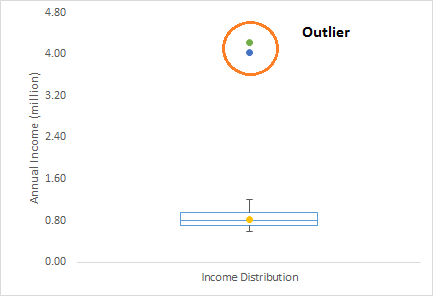


# What are the types of Outliers?

Outlier can be of two types: 
1. Univariate and 
2. Multivariate. 

Above, we have discussed the example of univariate outlier. These outliers can be found when we look at distribution of a single variable. 

Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

Let us understand this with an example. Let us say we are understanding the relationship between height and weight. Below, we have univariate and bivariate distribution for Height, Weight. Take a look at the box plot. We do not have any outlier (above and below 1.5*IQR, most common method). Now look at the scatter plot. Here, we have two values below and one above the average in a specific segment of weight and height.

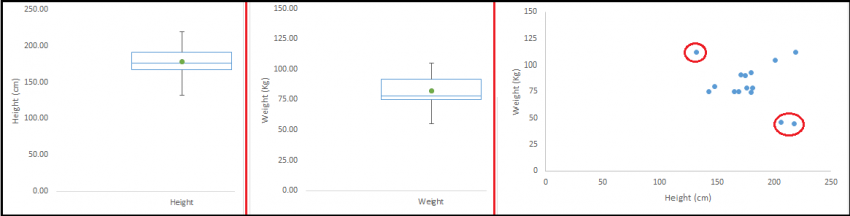


What causes Outliers?
==================

Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories:

1. Artificial (Error) / Non-natural
2. Natural.

Let’s understand various types of outliers in more detail:

    Data Entry Errors:- 
    ===============
    Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. For example: Annual income of a customer is 100,000. Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes 1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.

    Measurement Error: 
    ================
    It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.
    
    Experimental Error: 
    ==================
    Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.
    Intentional Outlier:
    ===============
    This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.

    Data Processing Error:
    ===================
    Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
    Sampling error: 
    ==============
    For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.

    Natural Outlier: 
    =============
        When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.

# What is the impact of Outliers on a dataset?

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

1. It increases the error variance and reduces the power of statistical tests
2. If the outliers are non-randomly distributed, they can decrease normality
3. They can bias or influence estimates that may be of substantive interest
4. They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set.

Example:
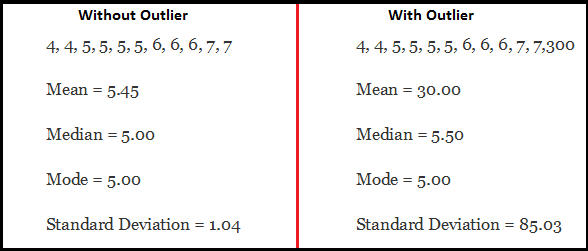

As you can see, data set with outliers has significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, average soars to 30. This would change the estimate completely.

How to detect Outliers?
===================
Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot (above, we have used box plot and scatter plot for visualization). Some analysts also various thumb rules to detect outliers. Some of them are:

1. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR 
2. Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
3. Data points, three or more standard deviation away from mean are considered outlier
4. Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
5. Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.
6. To identify outliers and influential observation,we also look at statistical measure like STUDENT, COOKD, RSTUDENT and others.

In [278]:
# find categorical variables
categorical = [var for var in df_tra.columns if df_tra[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 38 categorical variables


In [263]:
# find numerical variables columns in the data set
numerical = [var for var in df_tra.columns if df_tra[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 37 numerical variables


#### Find discrete variables
To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

In [271]:
# let's visualise the values of the discrete variables
discrete = []
for var in numerical:
    if len(df_tra[var].unique())<25:
        print(var, ' values: ', df_tra[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  2]
OverallCond  values:  [5 8 6 7 4 3 9 2]
LowQualFinSF  values:  [  0 360 528 572 144 392 390 420 473 156  80 232 481 120 397 384]
BsmtFullBath  values:  [1 0 2]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6]
KitchenAbvGr  values:  [1 2 3]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 4]
3SsnPorch  values:  [  0 320 407 130 180 168 140 508 238 245 196 144 182 162  23 216  96 153
 290 304]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MiscVal  values:  [    0   700   350   400   480   450   500 15500   800  2000   600  1300
  1200    54   620   560  1400  8300  1150  2500]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold  values:  [2008 2007 2006 2009 2010]
There are 18 discrete variables


In [272]:
continuous = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice']]
continuous

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

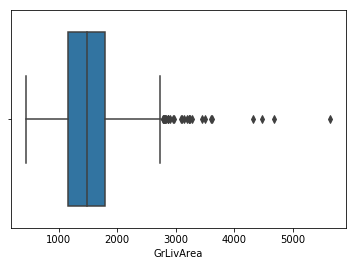

In [198]:
#Detecting Outliers using Boxplot for Univarient  , scatter plot for bivarient/multivarient 
sb.boxplot(df_tra['GrLivArea'])

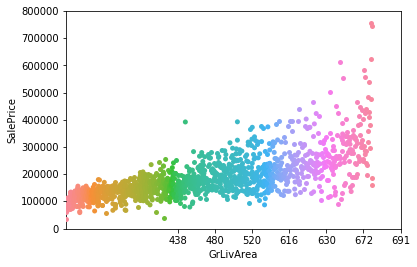

In [273]:
sb.stripplot(df_tra['GrLivArea'],df_tra['SalePrice'])
plt.xticks(np.arange(300,1000,100))
plt.show()

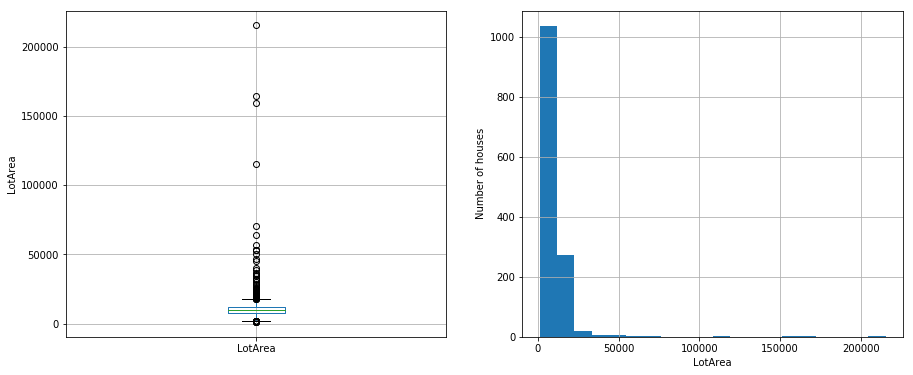

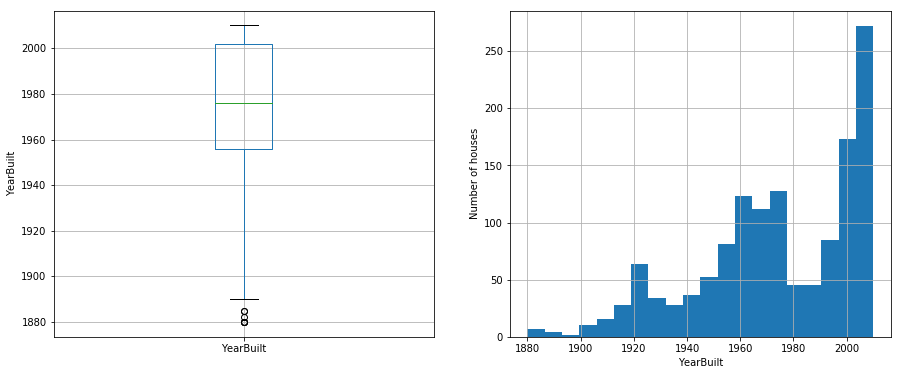

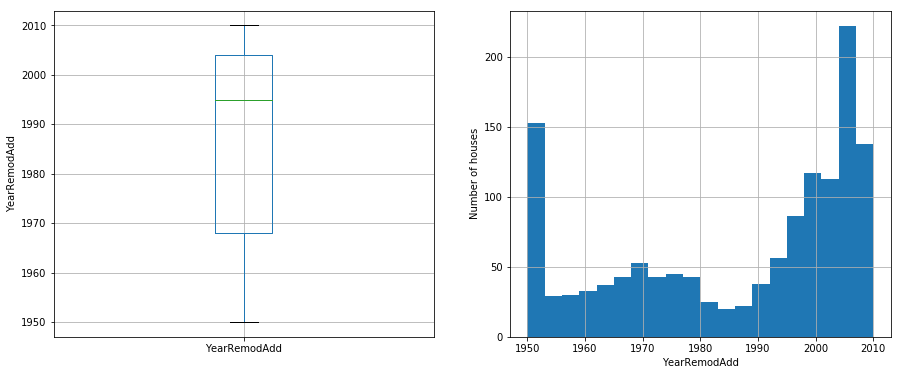

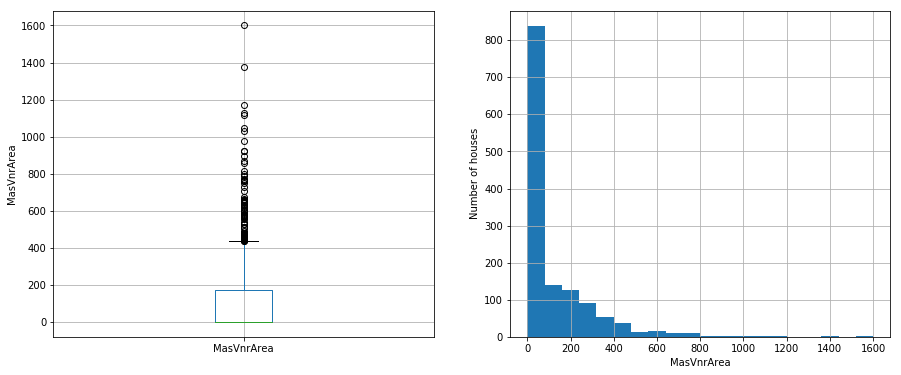

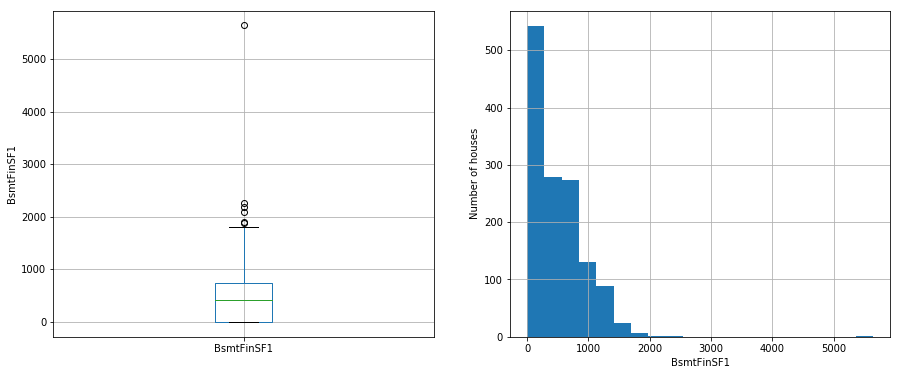

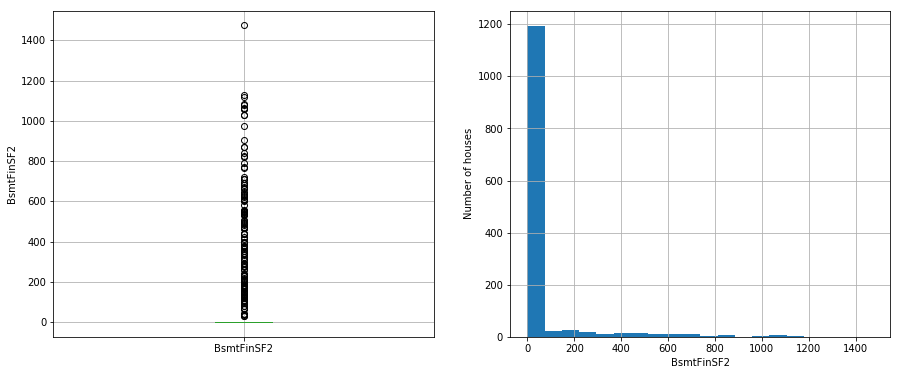

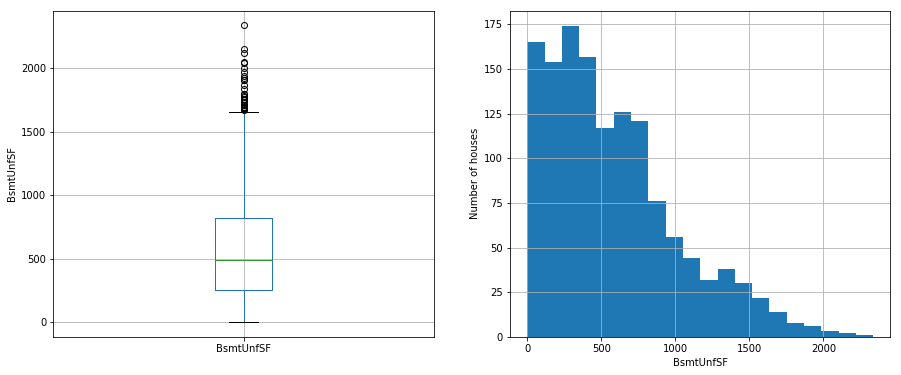

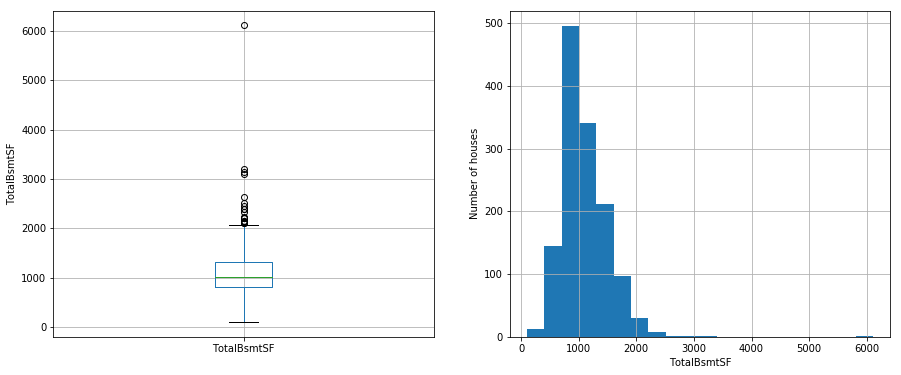

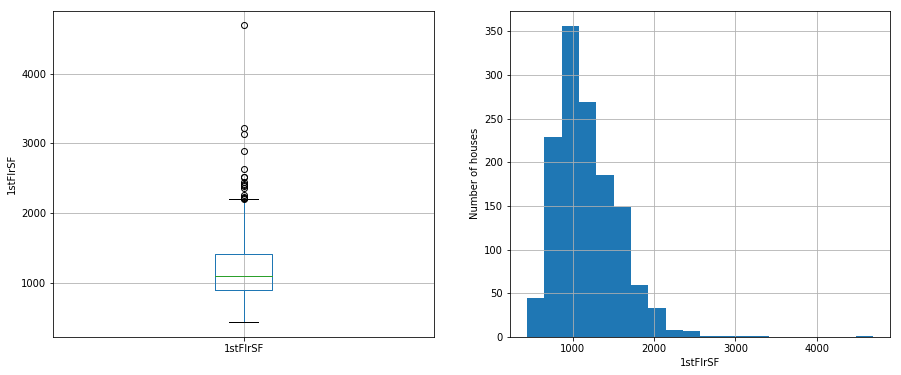

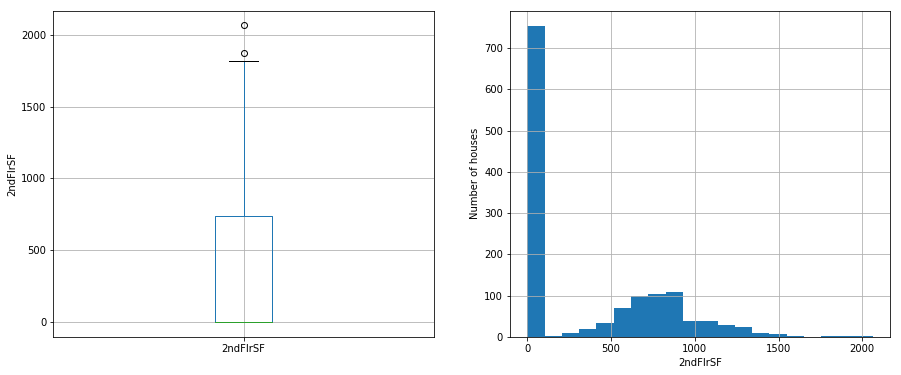

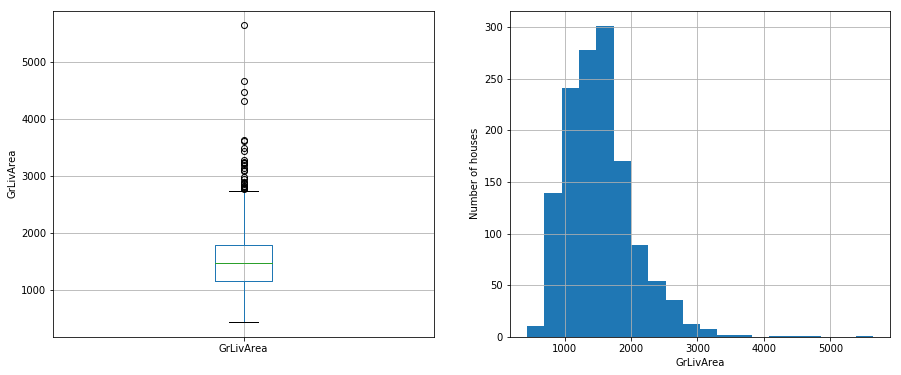

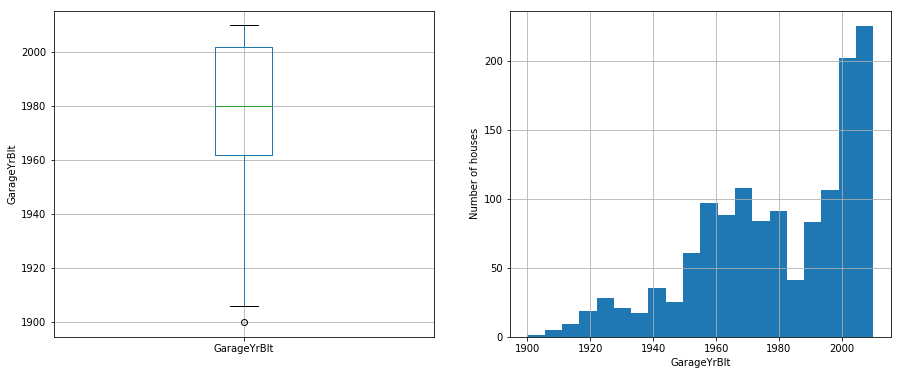

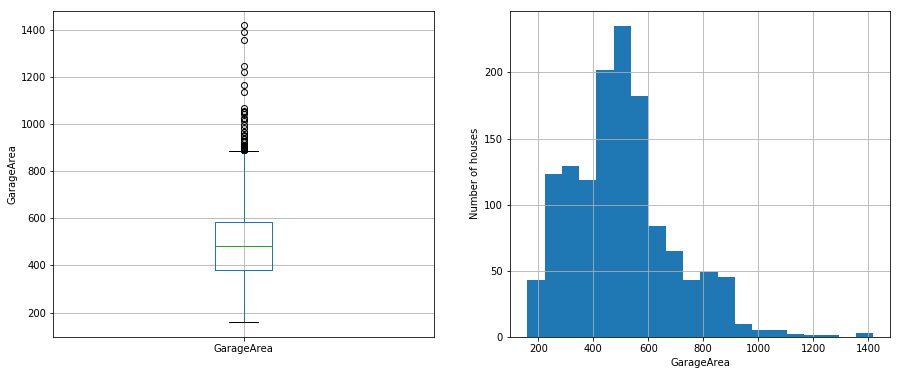

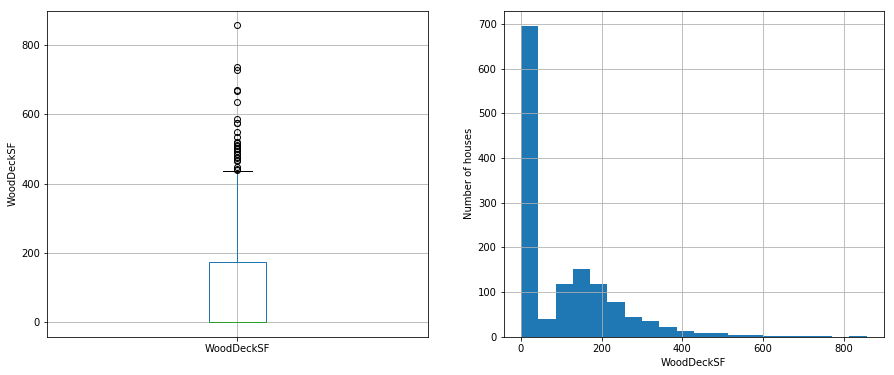

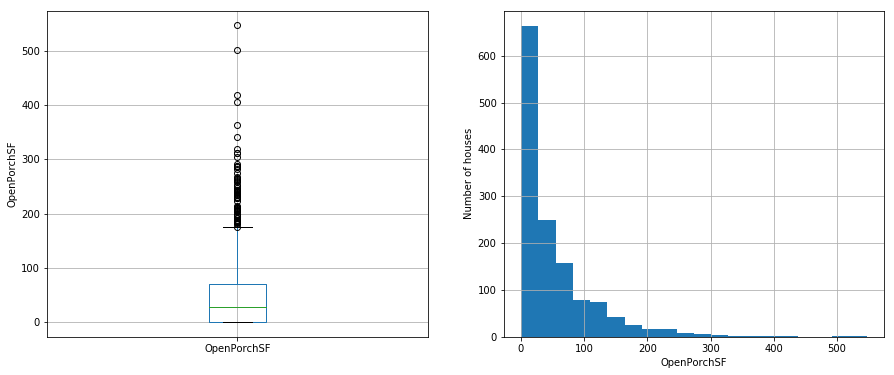

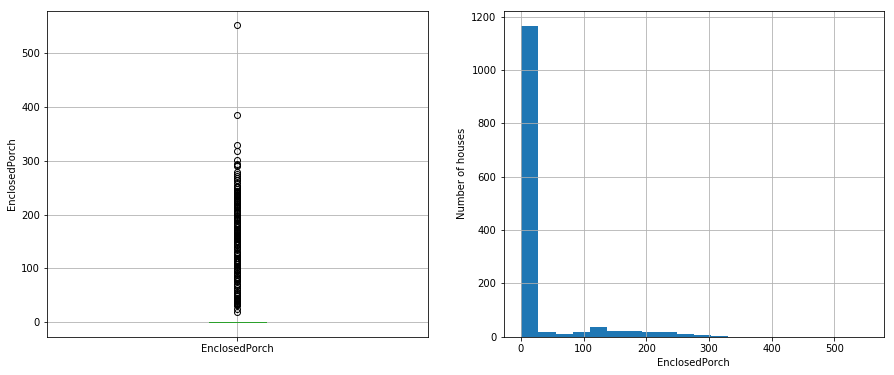

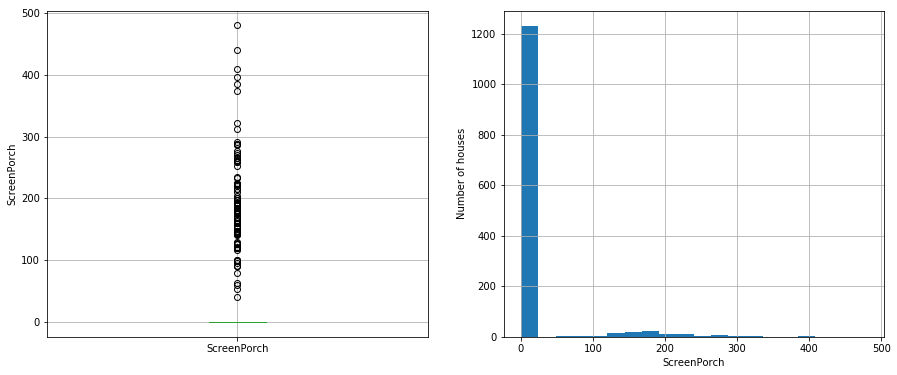

In [275]:
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df_tra.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = df_tra[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)



The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, I will do discretisation. And in particular, I will use trees to find the right buckets onto which I will divide the variables.

#### Outlies in discrete variables


Let's calculate the percentage of houses for each of the values that can take the discrete variables in the titanic dataset. I will call outliers, those values that are present in less than 1% of the houses. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical. Keep this in mind.

In [281]:
# outlies in discrete variables
for var in discrete:
    print(df_tra[var].value_counts() / np.float(len(df_tra)))
    print()

20     0.375929
60     0.220654
50     0.095840
120    0.064636
160    0.045319
80     0.042348
70     0.042348
30     0.037890
90     0.020802
190    0.015602
85     0.014116
75     0.010401
45     0.006686
180    0.004458
40     0.002972
Name: MSSubClass, dtype: float64

6     0.268202
5     0.260773
7     0.234770
8     0.123328
4     0.060178
9     0.031947
10    0.013373
3     0.005944
2     0.001486
Name: OverallQual, dtype: float64

5    0.576523
6    0.173848
7    0.135958
8    0.050520
4    0.034175
9    0.014859
3    0.011887
2    0.002229
Name: OverallCond, dtype: float64

0      0.986627
80     0.002229
360    0.001486
572    0.000743
528    0.000743
481    0.000743
473    0.000743
420    0.000743
397    0.000743
392    0.000743
390    0.000743
384    0.000743
232    0.000743
156    0.000743
144    0.000743
120    0.000743
Name: LowQualFinSF, dtype: float64

0    0.569094
1    0.421248
2    0.009658
Name: BsmtFullBath, dtype: float64

0    0.940565
1    0.058692
2    0.0007

In [255]:
#IQR Method 
od=df_tra.describe().T
q1=od['25%']
q2=od['50%']
q3=od['75%']
IQR=q3-q1
maxvalue=q3+(1.5*IQR)
#based on the IQR formulae we can detect the Outilers
#min value q1-1.5 x IQR to max value q3+1.5 x IQR behond this range is outlier
minvalue=q1-(1.5*IQR)
minvalue=pd.DataFrame(minvalue).rename(columns={0:'minvalue'})
maxvalue=pd.DataFrame(maxvalue).rename(columns={0:'maxvalue'})

In [259]:
#concat two dataframe
pd.concat([minvalue, maxvalue], axis=1)

,minvalue,maxvalue
Id,-730.000,2196.000
MSSubClass,-55.000,145.000
LotArea,1733.875,17776.875
OverallQual,2.000,10.000
OverallCond,3.500,7.500
YearBuilt,1887.375,2070.375
YearRemodAdd,1914.000,2058.000
MasVnrArea,-261.000,435.000
BsmtFinSF1,-1102.500,1837.500
BsmtFinSF2,0.000,0.000


# How to remove Outliers?
Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

Deleting observations:
==================
We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

Transforming and binning values: 
=========================
Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation. Decision Tree algorithm allows to deal with outliers well due to binning of variable. We can also use the process of assigning weights to different observations.

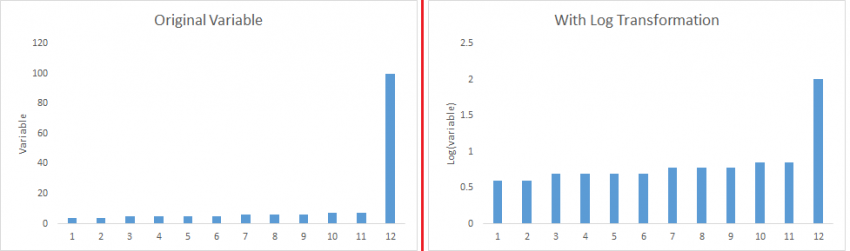

Imputing: 
=======
Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier observation and after that we can impute it with predicted values.

Treat separately: 
============
If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


Till here, we have learnt about steps of data exploration, missing value treatment and techniques of outlier detection and treatment. These 3 stages will make your raw data better in terms of information availability and accuracy. Let’s now proceed to the final stage of data exploration. It is Feature Engineering.

In [ ]:
#check above for removing outlier same as handling missing values

# Feature Engineering

What is Feature Engineering?
============
Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

For example, let’s say you are trying to predict foot fall in a shopping mall based on dates. If you try and use the dates directly, you may not be able to extract meaningful insights from the data. This is because the foot fall is less affected by the day of the month than it is by the day of the week. Now this information about day of week is implicit in your data. You need to bring it out to make your model better.

This exercising of bringing out information from data in known as feature engineering.

What is the process of Feature Engineering ?
=========
You perform feature engineering once you have completed the first 5 steps in data exploration – 
1. Variable Identification, 
2. Univariate, 
3. Bivariate Analysis, 
4. Missing Values Imputation and 
5. Outliers Treatment. 

Feature engineering itself can be divided in 2 steps:

1. Variable / Feature creation.
2. Variable transformation.

These two techniques are vital in data exploration and have a remarkable impact on the power of prediction. Let’s understand each of this step in more details.


# What is Feature / Variable Creation & its Benefits?
Feature / Variable creation is a process to generate a new variables / features based on existing variable(s). For example, say, we have date(dd-mm-yy) as an input variable in a data set. We can generate new variables like day, month, year, week, weekday that may have better relationship with target variable. This step is used to highlight the hidden relationship in a variable:

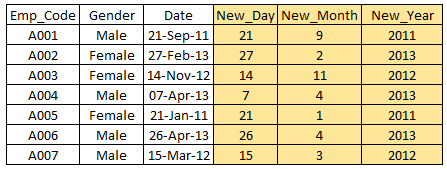

There are various techniques to create new features. Let’s look at the some of the commonly used methods:

Creating derived variables:
==================
This refers to creating new variables from existing variable(s) using set of functions or different methods. Let’s look at it through “Titanic – Kaggle competition”. In this data set, variable age has missing values. To predict missing values, we used the salutation (Master, Mr, Miss, Mrs) of name as a new variable. How do we decide which variable to create? Honestly, this depends on business understanding of the analyst, his curiosity and the set of hypothesis he might have about the problem. Methods such as taking log of variables, binning variables and other methods of variable transformation can also be used to create new variables.

# Creating dummy variables:
   One of the most common application of dummy variable is to convert categorical variable into numerical variables. Dummy variables are also called Indicator Variables. It is useful to take categorical variable as a predictor in statistical models.  Categorical variable can take values 0 and 1. Let’s take a variable ‘gender’. We can produce two variables, namely, “Var_Male” with values 1 (Male) and 0 (No male) and “Var_Female” with values 1 (Female) and 0 (No Female). We can also create dummy variables for more than two classes of a categorical variables with n or n-1 dummy variables.
 
 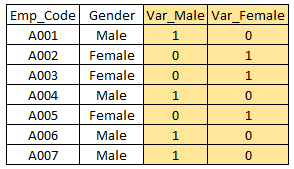

In [284]:
#Handling of categorical Varible
categorical #Categorical variable persent in the dataset

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [303]:
#Number of labels: cardinality
for var in categorical:
    print(var, ' contains ', len(df_tra[var].unique()), ' labels')

MSZoning  contains  5  labels
Street  contains  2  labels
LotShape  contains  4  labels
LandContour  contains  4  labels
Utilities  contains  2  labels
LotConfig  contains  5  labels
LandSlope  contains  3  labels
Neighborhood  contains  25  labels
Condition1  contains  9  labels
Condition2  contains  8  labels
BldgType  contains  5  labels
HouseStyle  contains  8  labels
RoofStyle  contains  6  labels
RoofMatl  contains  8  labels
Exterior1st  contains  14  labels
Exterior2nd  contains  16  labels
MasVnrType  contains  4  labels
ExterQual  contains  4  labels
ExterCond  contains  4  labels
Foundation  contains  5  labels
BsmtQual  contains  4  labels
BsmtCond  contains  4  labels
BsmtExposure  contains  4  labels
BsmtFinType1  contains  6  labels
BsmtFinType2  contains  6  labels
Heating  contains  4  labels
HeatingQC  contains  5  labels
CentralAir  contains  2  labels
Electrical  contains  5  labels
KitchenQual  contains  4  labels
Functional  contains  7  labels
GarageType  contain

In [286]:
df_tra['MSZoning'].value_counts()

RL         1071
RM          191
FV           65
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [300]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(df_tra['MSZoning'],prefix='MSZoning',drop_first=True)
cont.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [301]:
#Adding the results to the master dataframe
df_tra= pd.concat([df_tra,cont],axis=1)
df_tra.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,208500,0,0,1,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,181500,0,0,1,0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,223500,0,0,1,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,140000,0,0,1,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,250000,0,0,1,0


In [309]:
categorical.remove('Neighborhood')

In [311]:
categorical

['Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [312]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont1 = pd.get_dummies(df_tra,columns=categorical)
#Adding the results to the master dataframe
#telecom = pd.concat([df_tra,cont],axis=1)
cont1.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,CollgCr,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,RL,9600,Veenker,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,RL,11250,CollgCr,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,RL,9550,Crawfor,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,RL,14260,NoRidge,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


In [319]:
cont1=cont1.drop(columns='MSZoning')

In [320]:
cont1.describe(include='object')

,Neighborhood
count,1346
unique,25
top,NAmes
freq,209


In [322]:
#Label encoder
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
#one hot encoding 
from sklearn.preprocessing import OneHotEncoder

In [330]:
#Label Encoding technique
encode = LabelEncoder()
cont1['Neighborhood_cat']=encode.fit_transform(cont1['Neighborhood'])
cont1[['Neighborhood','Neighborhood_cat']].head()

,Neighborhood,Neighborhood_cat
0,CollgCr,5
1,Veenker,24
2,CollgCr,5
3,Crawfor,6
4,NoRidge,15


In [351]:
#One encoding for example 
enc = OneHotEncoder()
data=cont1[['Neighborhood','Neighborhood_cat']]
data1=enc.fit_transform(data[['Neighborhood_cat']])
data1=pd.DataFrame(data1.toarray())
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
data=pd.concat([data,data1],axis=1)
data.head()

,Neighborhood,Neighborhood_cat,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,CollgCr,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Veenker,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CollgCr,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Crawfor,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NoRidge,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
#cont1=cont1.drop(columns='Neighborhood')
cont1.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,0,1,0,5
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,0,1,0,24
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,0,1,0,5
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,1,0,0,0,0,0,6
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,0,1,0,15


In [360]:
#Checking any column having categorical variable
cont1.describe(include='object') #No objects avaiable

# What is Variable Transformation?

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Let’s look at the situations when  variable transformation is useful.

When should we use Variable Transformation?
=========
Below are the situations where variable transformation is a requisite:

1. When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distribution.

2. When we can transform complex non-linear relationships into linear relationships. Existence of a linear relationship between variables is easier to comprehend compared to a non-linear or curved relation. Transformation helps us to convert a non-linear relation into linear relation. Scatter plot can be used to find the relationship between two continuous variables. These transformations also improve the prediction. Log transformation is one of the commonly used transformation technique used in these situations.

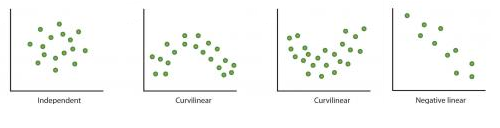

Symmetric distribution is preferred over skewed distribution as it is easier to interpret and generate inferences. Some modeling techniques requires normal distribution of variables. So, whenever we have a skewed distribution, we can use transformations which reduce skewness. 
1. For right skewed distribution, we take square / cube root or logarithm of variable and 
2. For left skewed, we take square / cube or exponential of variables.

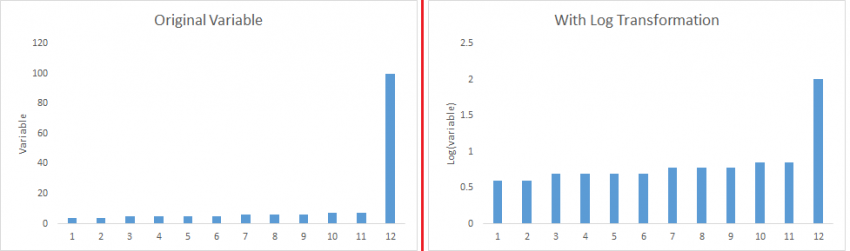

Variable Transformation is also done from an implementation point of view (Human involvement). Let’s understand it more clearly. In one of my project on employee performance, I found that age has direct correlation with performance of the employee i.e. higher the age, better the performance. From an implementation stand point, launching age based progamme might present implementation challenge. However, categorizing the sales agents in three age group buckets of <30 years, 30-45 years and >45  and then formulating three different strategies for each group is a judicious approach. This categorization technique is known as Binning of Variables.

What are the common methods of Variable Transformation?
==========
There are various methods used to transform variables. As discussed, some of them include square root, cube root, logarithmic, binning, reciprocal and many others. Let’s look at these methods in detail by highlighting the pros and cons of these transformation methods.

    Logarithm:
    =========
    Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.

    Square / Cube root: 
    ==================
    The square and cube root of a variable has a sound effect on variable distribution. However, it is not as significant as logarithmic transformation. Cube root has its own advantage. It can be applied to negative values including zero. Square root can be applied to positive values including zero.

    Binning: 
    =======
    It is used to categorize variables. It is performed on original values, percentile or frequency. Decision of categorization technique is based on business understanding. For example, we can categorize income in three categories, namely: High, Average and Low. We can also perform co-variate binning which depends on the value of more than one variables.


In [519]:
#Spliting the X value and Y Value
y=cont1[['SalePrice']]
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [363]:
x=cont1.drop(columns=['Id','SalePrice'])

In [371]:
x.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,1,0,0,0,0,1,0,5
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,1,0,0,0,0,1,0,24
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,1,0,0,0,0,1,0,5
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,1,1,0,0,0,0,0,6
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,1,0,0,0,0,1,0,15


In [405]:
x.shape,y.shape

((1346, 239), (1346, 1))

# Types Of Variable Transformation
1. Standardization
2. Normalization 
3. Scaling to Minimum And Maximum values
4. Scaling To Median And Quantiles
5. Guassian Transformation 
     1. Logarithmic Transformation 
     2. Reciprocal Trnasformation 
     3. Square Root Transformation 
     4. Exponential Trnasformation 
     5. Box Cox Transformation


# Standarization
Standarization is also used to bring all the variables to a similar scale. Standarization means centering the variable at zero, and standarizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:
z = (x - x_mean) / std

In [392]:
#Standarization means centering the variable at zero. z=(x-x_mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create an object
X_scaled = scaler.fit_transform(x) # fit the scaler to the train set, and then transform it

In [395]:
X_scaled=pd.DataFrame(X_t_scaled,columns=x.columns)
X_scaled.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,0.095035,-0.219483,0.583981,-0.549472,1.008856,0.850062,0.462090,0.522711,-0.295297,-0.984137,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,-1.220645
1,-0.875869,-0.108069,-0.170374,2.234428,0.095343,-0.481359,-0.597003,1.114902,-0.295297,-0.679286,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,1.918296
2,0.095035,0.051786,0.583981,-0.549472,0.941188,0.800751,0.278370,0.043733,-0.295297,-0.338036,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,-1.220645
3,0.337760,-0.112913,0.583981,-0.549472,-1.968520,-0.777230,-0.597003,-0.544104,-0.295297,-0.096885,...,-0.312857,-0.027267,0.396676,3.827684,-0.027267,-0.077324,-0.122813,-2.157652,-0.317131,-1.055437
4,0.095035,0.343400,1.338335,-0.549472,0.907354,0.702127,1.294234,0.411675,-0.295297,-0.210636,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,0.431429


In [400]:
X_scaled.mean().head(),X_scaled.std().head()

(MSSubClass    -1.619969e-16
 LotArea       -1.656880e-17
 OverallQual   -1.921857e-16
 OverallCond    3.779377e-16
 YearBuilt      2.589682e-15
 dtype: float64, MSSubClass     1.000372
 LotArea        1.000372
 OverallQual    1.000372
 OverallCond    1.000372
 YearBuilt      1.000372
 dtype: float64)

(array([1.035e+03, 2.740e+02, 1.800e+01, 6.000e+00, 6.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.91218709,  0.1241808 ,  1.16054868,  2.19691656,  3.23328444,
         4.26965232,  5.3060202 ,  6.34238808,  7.37875597,  8.41512385,
         9.45149173, 10.48785961, 11.52422749, 12.56059537, 13.59696325,
        14.63333114, 15.66969902, 16.7060669 , 17.74243478, 18.77880266,
        19.81517054]),
 <a list of 20 Patch objects>)

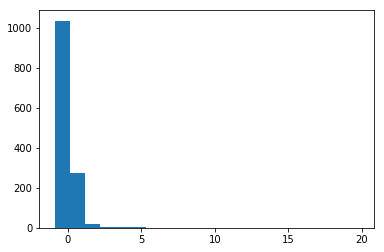

In [401]:
#Plot the Histogram for Transformed Data on Continuous Varible
plt.hist(X_scaled['LotArea'],bins=20)

(array([1226.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  120.]),
 array([-0.31285665, -0.13739621,  0.03806423,  0.21352466,  0.3889851 ,
         0.56444554,  0.73990597,  0.91536641,  1.09082685,  1.26628728,
         1.44174772,  1.61720816,  1.79266859,  1.96812903,  2.14358947,
         2.3190499 ,  2.49451034,  2.66997078,  2.84543121,  3.02089165,
         3.19635209]),
 <a list of 20 Patch objects>)

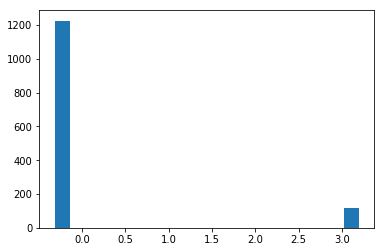

In [403]:
#Plot the Histogram for Transformed Data on Categorical Varible
plt.hist(X_scaled['SaleType_New'],bins=20)

# Normalizer
The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples. It can be seen on both figures below where all samples are mapped onto the unit circle. In our example the two selected features have only positive values; therefore the transformed data only lie in the positive quadrant. This would not be the case if some original features had a mix of positive and negative values.

In [383]:
#Normalization it value between -1 to 1  by Default it uses L2 Technique
from sklearn.preprocessing import Normalizer
Norm=Normalizer()
X_Norm=Norm.fit_transform(x)
X_Norm=pd.DataFrame(X_Norm,columns=x.columns)
X_Norm.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,0.006206,0.874081,0.000724,0.000517,0.207193,0.207193,0.020275,0.073030,0.0,0.015516,...,0.0,0.0,0.000103,0.000000,0.0,0.0,0.0,0.000103,0.0,0.000517
1,0.001873,0.899050,0.000562,0.000749,0.185054,0.185054,0.000000,0.091591,0.0,0.026597,...,0.0,0.0,0.000094,0.000000,0.0,0.0,0.0,0.000094,0.0,0.002248
2,0.004914,0.921422,0.000573,0.000410,0.163890,0.163972,0.013268,0.039805,0.0,0.035546,...,0.0,0.0,0.000082,0.000000,0.0,0.0,0.0,0.000082,0.0,0.000410
3,0.006596,0.899934,0.000660,0.000471,0.180458,0.185641,0.000000,0.020355,0.0,0.050886,...,0.0,0.0,0.000094,0.000094,0.0,0.0,0.0,0.000000,0.0,0.000565
4,0.003961,0.941341,0.000528,0.000330,0.132025,0.132025,0.023104,0.043238,0.0,0.032346,...,0.0,0.0,0.000066,0.000000,0.0,0.0,0.0,0.000066,0.0,0.000990


(array([  1.,   4.,   8.,  11.,   9.,   9.,  10.,  11.,  10.,  14.,  13.,
         22.,  21.,  15.,  58., 109., 302., 438., 221.,  60.]),
 array([0.28717447, 0.32279906, 0.35842364, 0.39404823, 0.42967282,
        0.46529741, 0.500922  , 0.53654658, 0.57217117, 0.60779576,
        0.64342035, 0.67904493, 0.71466952, 0.75029411, 0.7859187 ,
        0.82154328, 0.85716787, 0.89279246, 0.92841705, 0.96404163,
        0.99966622]),
 <a list of 20 Patch objects>)

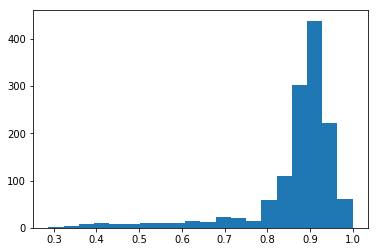

In [384]:
#Plot the Histogram for Transformed Data Continuous Variable
plt.hist(X_Norm['LotArea'],bins=20)

(array([1.226e+03, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 3.000e+00,
        1.300e+01, 1.600e+01, 2.200e+01, 1.600e+01, 1.700e+01, 8.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00]),
 array([0.00000000e+00, 9.39570590e-06, 1.87914118e-05, 2.81871177e-05,
        3.75828236e-05, 4.69785295e-05, 5.63742354e-05, 6.57699413e-05,
        7.51656472e-05, 8.45613531e-05, 9.39570590e-05, 1.03352765e-04,
        1.12748471e-04, 1.22144177e-04, 1.31539883e-04, 1.40935589e-04,
        1.50331294e-04, 1.59727000e-04, 1.69122706e-04, 1.78518412e-04,
        1.87914118e-04]),
 <a list of 20 Patch objects>)

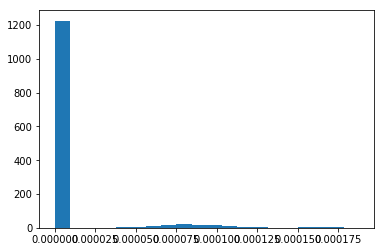

In [404]:
#Plot the Histogram for Transformed Data Categorical Variable
plt.hist(X_Norm['SaleType_New'],bins=20)

# Min Max Scaling 

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the range:

X_scaled = (X - (X.min / (X.max - X.min)))

The minimum maximum scaling method has the same disadvantage that standarisation, which is that it compresses the observations in the narrow range if the variable is very skewed or has outliers.


In [407]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_minmax=pd.DataFrame(min_max.fit_transform(x),columns=x.columns)
X_minmax.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,0.235294,0.033420,0.625,0.428571,0.946154,0.883333,0.12250,0.125089,0.0,0.064212,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.208333
1,0.000000,0.038795,0.500,0.857143,0.738462,0.433333,0.00000,0.173281,0.0,0.121575,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
2,0.235294,0.046507,0.625,0.428571,0.930769,0.866667,0.10125,0.086109,0.0,0.185788,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.208333
3,0.294118,0.038561,0.625,0.428571,0.269231,0.333333,0.00000,0.038271,0.0,0.231164,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.250000
4,0.235294,0.060576,0.750,0.428571,0.923077,0.833333,0.21875,0.116052,0.0,0.209760,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625000


(array([506.,  51.,  13., 129., 297.,  57.,  14.,  76.,  28.,   0.,   0.,
         87.,   0.,   0.,   0.,   0.,  61.,   0.,   6.,  21.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

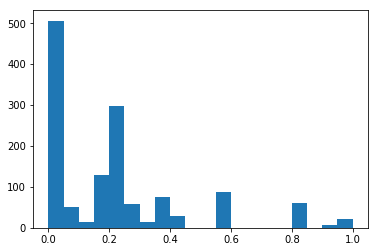

In [408]:
plt.hist(X_minmax['MSSubClass'],bins=20)


(array([  2.,   0.,   8.,   0.,   0.,  81.,   0., 351.,   0.,   0., 361.,
          0., 316.,   0.,   0., 166.,   0.,  43.,   0.,  18.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

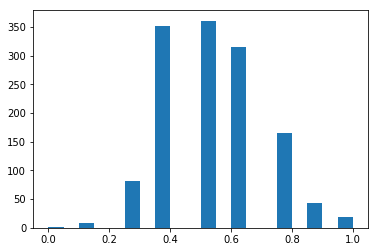

In [409]:
plt.hist(X_minmax['OverallQual'],bins=20)


# Robust Scaler or Scaling to median and quantiles
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

In [410]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_robust=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X_robust.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,0.2,-0.286729,0.5,0.0,0.590164,0.222222,1.126437,0.395238,0.0,-0.597094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7
1,-0.6,0.000000,0.0,3.0,0.000000,-0.527778,0.000000,0.765306,0.0,-0.361074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
2,0.2,0.411394,0.5,0.0,0.546448,0.194444,0.931034,0.095918,0.0,-0.096874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7
3,0.4,-0.012466,0.5,0.0,-1.333333,-0.694444,0.000000,-0.271429,0.0,0.089828,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,-0.6
4,0.2,1.161877,1.0,0.0,0.524590,0.138889,2.011494,0.325850,0.0,0.001761,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3


(array([  2.,   0.,   8.,   0.,   0.,  81.,   0., 351.,   0.,   0., 361.,
          0., 316.,   0.,   0., 166.,   0.,  43.,   0.,  18.]),
 array([-2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,
         0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 20 Patch objects>)

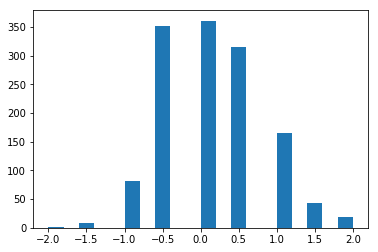

In [411]:
plt.hist(X_robust['OverallQual'],bins=20)


# Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation

In [414]:
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

### Logarithmic transformation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


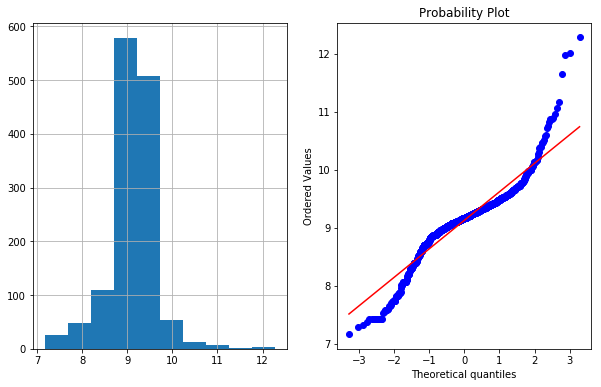

In [416]:

df=x[['LotArea']]
df['lot_log']=np.log(df['LotArea'])
plot_data(df,'lot_log')

### Reciprocal Transformation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


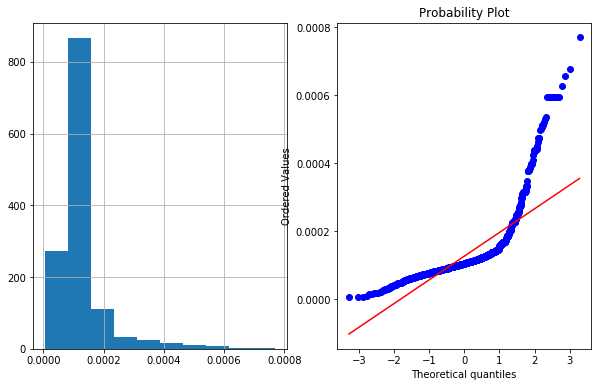

In [417]:

df['lot_reciprocal']=1/df.LotArea
plot_data(df,'lot_reciprocal')

### Square Root Transformation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


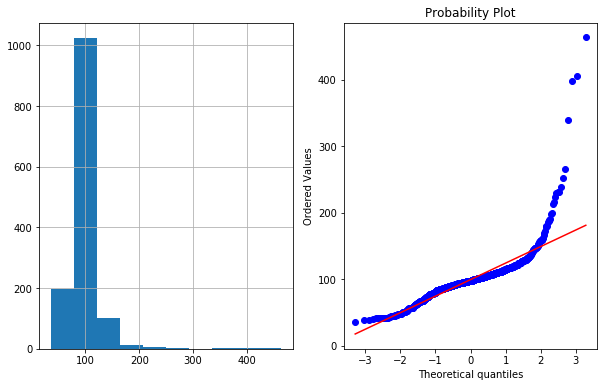

In [418]:

df['lot_sqaure']=df.LotArea**(1/2)
plot_data(df,'lot_sqaure')

### Exponential Transformation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


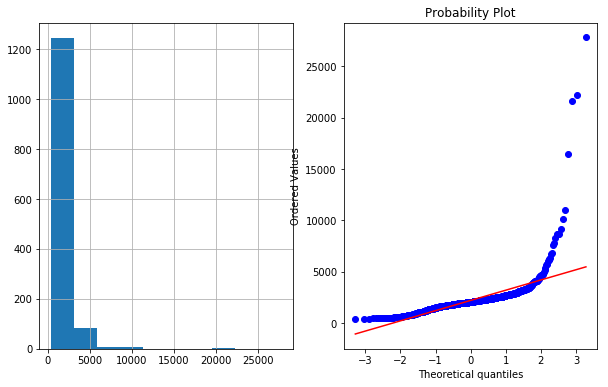

In [419]:

df['lot_exponential']=df.LotArea**(1/1.2)
plot_data(df,'lot_exponential')

### BoxCox Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [420]:
df['lot_Boxcox'],parameters=stat.boxcox(df['LotArea'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [421]:
parameters

0.015121839770074851

In [423]:
df['lot_Boxcox'].head()

0     9.689238
1     9.835672
2    10.018085
3     9.829673
4    10.291583
Name: lot_Boxcox, dtype: float64

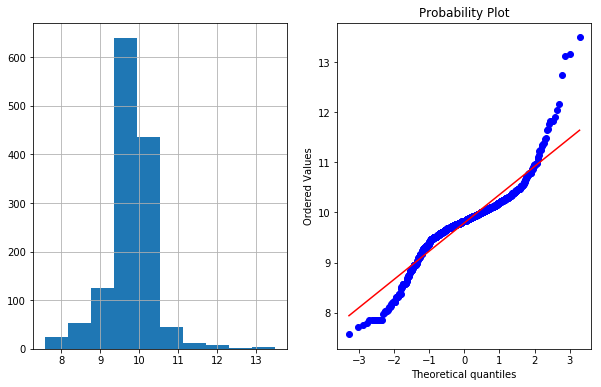

In [424]:
plot_data(df,'lot_Boxcox')

# Cross Validation


Why do models lose stability?
==
Let’s understand this using the below snapshot illustrating the fit of various models:

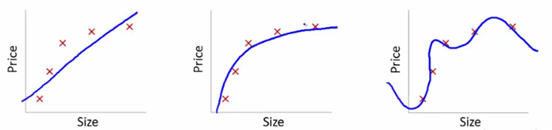


Here, we are trying to find the relationship between size and price. To achieve this, we have taken the following steps:

1. We’ve established the relationship using a linear equation for which the plots have been shown. The first plot has a high error from training data points. Therefore, this will not perform well on either public or the private leaderboard. This is an example of “Underfitting”. In this case, our model fails to capture the underlying trend of the data
2. In the second plot, we just found the right relationship between price and size, i.e., low training error and generalization of the relationship
3. In the third plot, we found a relationship which has almost zero training error. This is because the relationship is developed by considering each deviation in the data point (including noise), i.e., the model is too sensitive and captures random patterns which are present only in the current dataset. This is an example of “Overfitting”. In this relationship, there could be a high deviation between the public and private leaderboards

    A common practice in data science competitions is to iterate over various models to find a better performing model. However, it becomes difficult to distinguish whether this improvement in score is coming because we are capturing the relationship better, or we are just over-fitting the data. To find the right answer for this question, we use validation techniques. This method helps us in achieving more generalized relationships.

 

What is Cross Validation?
===
Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

Here are the steps involved in cross validation:

1. You reserve a sample data set
2. Train the model using the remaining part of the dataset
3. Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. It rocks!
 

A few common methods used for Cross Validation

There are various methods available for performing cross validation. I’ve discussed a few of them in this section.

1. The Validation set Approach (Train Test Split)
2. Leave out one cross validation (LOOCV)
3. k-fold cross validation
4. Stratified k-fold cross validation
5. Adversarial validation
6. Cross validation for time series
7. Custom cross validation techniques



# The validation set approach
In this approach, we reserve 20% of the dataset for validation and the remaining 80% for model training. However, a major disadvantage of this approach is that since we are training a model on only 20% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias.

In [425]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [427]:
x_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
638,-0.147691,-0.445217,-0.924729,0.378495,-1.258009,-1.763468,-0.597003,-1.014373,-0.295297,0.783541,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,-1.551060
902,-0.875869,-0.184024,-0.924729,0.378495,-0.344497,-1.122414,-0.597003,0.402966,-0.295297,-0.256136,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,1.092259
349,-0.875869,-0.340585,0.583981,-0.549472,1.110357,0.997998,-0.597003,-1.014373,-0.295297,1.616193,...,3.196352,-0.027267,-2.520950,-0.261255,-0.027267,-0.077324,-0.122813,-2.157652,3.153266,1.422674
1173,-0.147691,-0.518654,-0.924729,0.378495,-2.137689,0.850062,-0.597003,-1.014373,-0.295297,0.178390,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,-1.055437
216,0.095035,-0.122310,0.583981,1.306461,0.670518,0.850062,-0.597003,-0.139150,-0.295297,0.025965,...,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131,1.257467


In [429]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1076, 239), (270, 239), (1076, 1), (270, 1))

# Leave one out cross validation (LOOCV)
In this approach, we reserve only one data point from the available dataset, and train the model on the rest of the data. This process iterates for each data point. This also has its own advantages and disadvantages. Let’s look at them:

1. We make use of all data points, hence the bias will be low
2. We repeat the cross validation process n times (where n is number of data points) which results in a higher execution time
3. This approach leads to higher variation in testing model effectiveness because we test against one data point. So, our estimation gets highly influenced by the data point. If the data point turns out to be an outlier, it can lead to a higher variation

In [441]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X_scaled)

1346

In [451]:
for train_index, test_index in loo.split(X_scaled):
    X_lctrain, X_lctest = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_lctrain, y_lctest = y.iloc[train_index], y.iloc[test_index]

In [455]:
X_lctrain.shape, X_lctest.shape,y_lctrain.shape, y_lctest.shape

((1345, 239), (1, 239), (1345, 1), (1, 1))

# k-fold cross validation
From the above two validation methods, we’ve learnt:

1. We should train the model on a large portion of the dataset. Otherwise we’ll fail to read and recognise the underlying trend in the data. This will eventually result in a higher bias
2. We also need a good ratio of testing data points. As we have seen above, less amount of data points can lead to a variance error while testing the effectiveness of the model
3. We should iterate on the training and testing process multiple times. We should change the train and test dataset distribution. This helps in validating the model effectiveness properly

Do we have a method which takes care of all these 3 requirements?

Yes! That method is known as “k-fold cross validation”. It’s easy to follow and implement. Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

Below is the visualization of a k-fold validation when k=10.

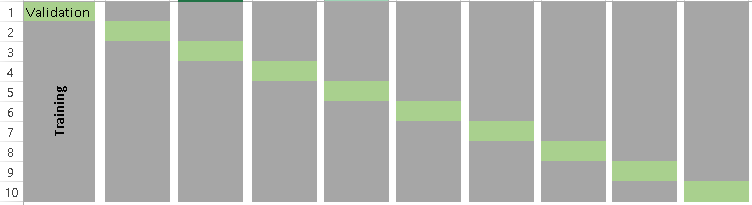

Now, one of most commonly asked questions is, “How to choose the right value of k?”.

Always remember, a lower value of k is more biased, and hence undesirable. On the other hand, a higher value of K is less biased, but can suffer from large variability. It is important to know that a smaller value of k always takes us towards validation set approach, whereas a higher value of k leads to LOOCV approach.

Precisely, LOOCV is equivalent to n-fold cross validation where n is the number of training examples.



In [457]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=2) 

for train_index, test_index in kf.split(X_scaled):
      #print("Train:", train_index, "Validation:",test_index)
    X_kftrain, X_kftest = X_scaled.iloc[train_index], X_scaled.iloc[test_index] 
    y_kftrain, y_kftest = y.iloc[train_index], y.iloc[test_index]

In [458]:
X_kftrain.shape, X_kftest.shape,y_kftrain.shape, y_kftest.shape

((1077, 239), (269, 239), (1077, 1), (269, 1))

# Stratified k-fold cross validation
Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.
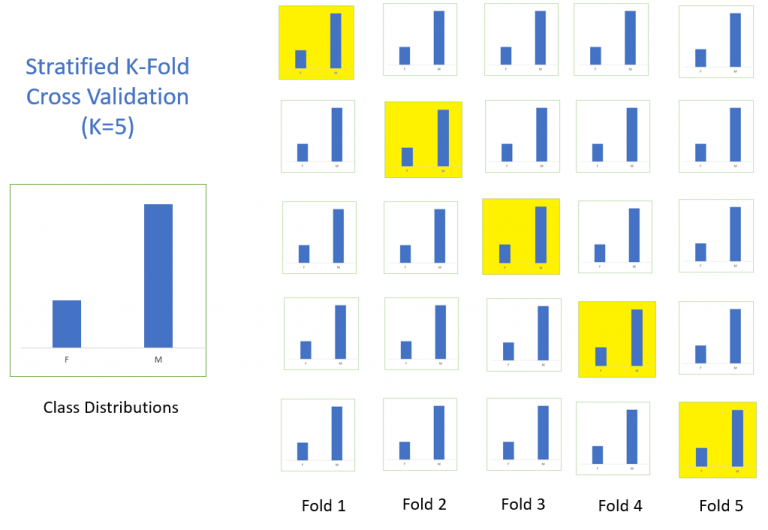
It is generally a better approach when dealing with both bias and variance. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

In [462]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X_scaled,y): 
    #print("Train:", train_index, "Validation:", test_index) 
    X_skftrain, X_skftest = X_scaled.iloc[train_index], X_scaled.iloc[test_index] 
    y_skftrain, y_skftest = y.iloc[train_index], y.iloc[test_index]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [463]:
X_skftrain.shape, X_skftest.shape,y_skftrain.shape, y_skftest.shape

((1261, 239), (85, 239), (1261, 1), (85, 1))

# Repeated k-fold cross validation
Having said that, if the train set does not adequately represent the entire population, then using a stratified k-fold might not be the best idea. In such cases, one should use a simple k-fold cross validation with repetition.

In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation.

In [466]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5,  n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X_scaled,y): 
    #print("Train:", train_index, "Validation:", test_index) 
    X_rkftrain, X_rkftest = X_scaled.iloc[train_index], X_scaled.iloc[test_index] 
    y_rkftrain, y_rkftest = y.iloc[train_index], y.iloc[test_index]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [467]:
X_rkftrain.shape, X_rkftest.shape,y_rkftrain.shape, y_rkftest.shape

((1261, 239), (85, 239), (1261, 1), (85, 1))

# Adversarial Validation
When dealing with real datasets, there are often cases where the test and train sets are very different. As a result, the internal cross-validation techniques might give scores that are not even in the ballpark of the test score. In such cases, adversarial validation offers an interesting solution.

The general idea is to check the degree of similarity between training and tests in terms of feature distribution. If It does not seem to be the case, we can suspect they are quite different. This intuition can be quantified by combining train and test sets, assigning 0/1 labels (0 – train, 1-test) and evaluating a binary classification task.

Let us understand, how this can be accomplished in the below steps:



In [ ]:
#Remove the target variable from the train set
train.drop(['target'], axis = 1, inplace = True)
#Create a new target variable which is 1 for each row in the train set, and 0 for each row in the test set
train['is_train'] = 1
test['is_train'] = 0
#Combine the train and test datasets
df = pd.concat([train, test], axis = 0)
#Using the above newly created target variable, fit a classification model and 
#predict probabilities for each row to be in the test set
y = df['is_train']; df.drop('is_train', axis = 1, inplace = True) 
# Xgboost parameters
xgb_params = {'learning_rate': 0.05, 
              'max_depth': 4,
              'subsample': 0.9,        
              'colsample_bytree': 0.9,
              'objective': 'binary:logistic',
              'silent': 1, 
              'n_estimators':100, 
              'gamma':1,         
              'min_child_weight':4}   
clf = xgb.XGBClassifier(**xgb_params, seed = 10)
#Sort the train set using the calculated probabilities in step 4 
#and take top n% samples/rows as the validation set (n% is the fraction of the train set you want to keep in the validation set)
probs = clf.predict_proba(x1)[:,1]
new_df = pd.DataFrame({'id':train.id, 'probs':probs})
new_df = new_df.sort_values(by = 'probs', ascending=False) # 30% validation set
val_set_ids = new_df.iloc[1:np.int(new_df.shape[0]*0.3),1]
#val_set_ids will get you the ids from the train set that would constitute the validation set which is most similar to the test 
#set. This will make your validation strategy more robust for cases where the train and test sets are highly dissimilar.

#However, you must be careful while using this type of validation technique. Once the distribution of the test set changes, 
#the validation set might no longer be a good subset to evaluate your model on.



# Cross Validation for time series
Splitting a time-series dataset randomly does not work because the time section of your data will be messed up. For a time series forecasting problem, we perform cross validation in the following manner.

Folds for time series cross valdiation are created in a forward chaining fashion
Suppose we have a time series for yearly consumer demand for a product during a period of n years. The folds would be created like:
fold 1: training [1], test [2]
fold 2: training [1 2], test [3]
fold 3: training [1 2 3], test [4]
fold 4: training [1 2 3 4], test [5]
fold 5: training [1 2 3 4 5], test [6]
.
.
.
fold n: training [1 2 3 ….. n-1], test [n]

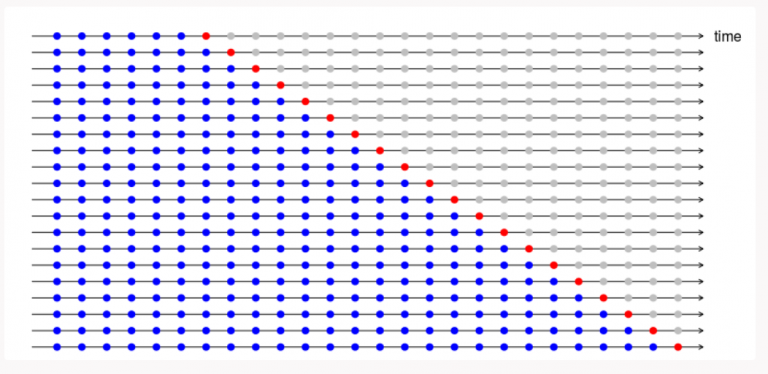

We progressively select a new train and test set. We start with a train set which has a minimum number of observations needed for fitting the model. Progressively, we change our train and test sets with each fold. In most cases, 1 step forecasts might not be very important. In such instances, the forecast origin can be shifted to allow for multi-step errors to be used. For example, in a regression problem, the following code could be used for performing cross validation.



In [484]:
#Python Code:

from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
tscv = TimeSeriesSplit(n_splits=3)
for train_index, val_index in tscv.split(X):
     print("Train:", train_index, "Validation:", val_index)
     X_train, X_test = X[train_index], X[val_index]
     y_train, y_test = y[train_index], y[val_index]



Train: [0] Validation: [1]
Train: [0 1] Validation: [2]
Train: [0 1 2] Validation: [3]


# Custom Cross Validation Techniques
Unfortunately, there is no single method that works best for all kinds of problem statements. Often, a custom cross validation technique based on a feature, or combination of features, could be created if that gives the user stable cross validation scores while making submissions in hackathons.

For example, in the recently finished contest ‘Lord of the Machines‘ by Analytics Vidhya, the most stable validation technique used by the top finishers was using the campaign id variable.

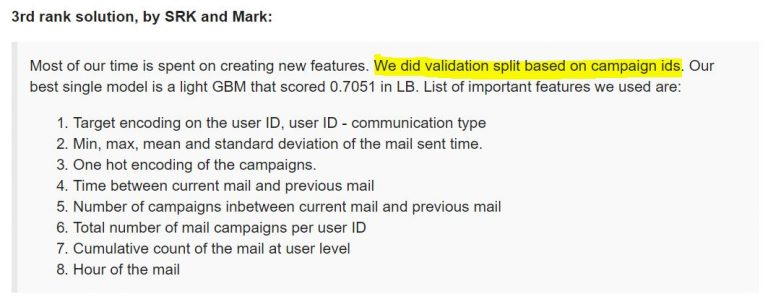

# Feature Selection

 
Importance of Feature Selection in Machine Learning
==
Machine learning works on a simple rule – if you put garbage in, you will only get garbage to come out. By garbage here, I mean noise in data.

This becomes even more important when the number of features are very large. You need not use every feature at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important. I have myself witnessed feature subsets giving better results than complete set of feature for the same algorithm. Or as Rohan Rao puts it – “Sometimes, less is better!”

Not only in the competitions but this can be very useful in industrial applications as well. You not only reduce the training time and the evaluation time, you also have less things to worry about!

Top reasons to use feature selection are:

1. It enables the machine learning algorithm to train faster.
2. It reduces the complexity of a model and makes it easier to interpret.
3. It improves the accuracy of a model if the right subset is chosen.
4. It reduces overfitting.
Next, we’ll discuss various methodologies and techniques that you can use to subset your feature space and help your models perform better and efficiently. So, let’s get started.



# Filter Methods

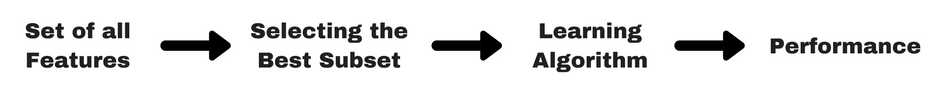

Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here. For basic guidance, you can refer to the following table for defining correlation co-efficients.

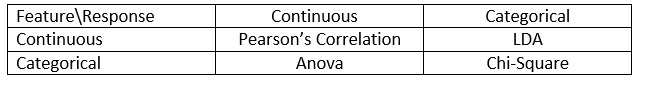

    Pearson’s Correlation:
    =====================
    It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:

  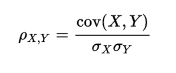
        
    LDA:
    ====
    Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.
    ANOVA:
    ======
    ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.
    Chi-Square:
    ============
    It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.
One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

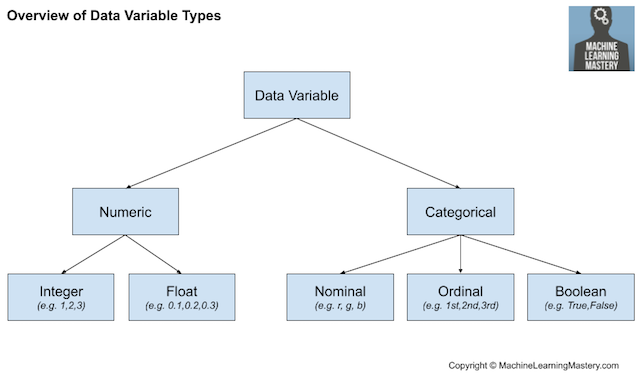

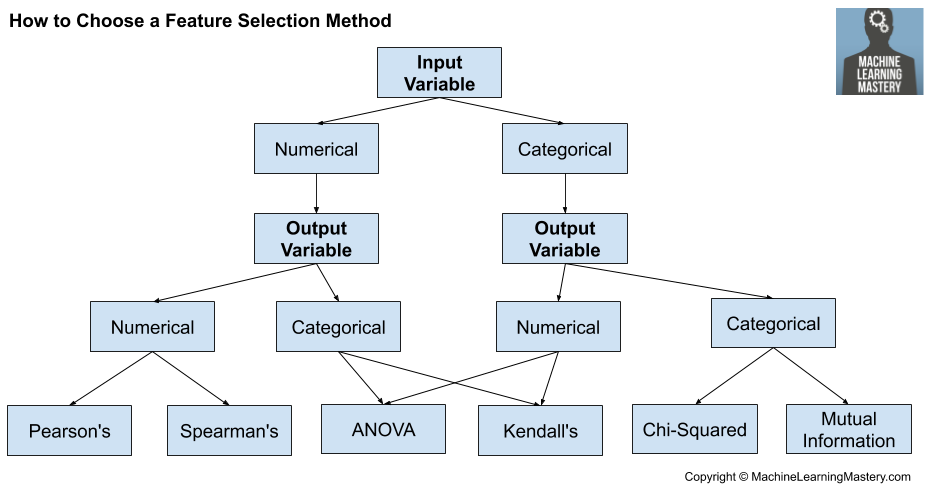

Numerical Input, Numerical Output
====
This is a regression predictive modeling problem with numerical input variables.

The most common techniques are to use a correlation coefficient, such as Pearson’s for a linear correlation, or rank-based methods for a nonlinear correlation.

Pearson’s correlation coefficient (linear).
Spearman’s rank coefficient (nonlinear)

Numerical Input, Categorical Output
==
This is a classification predictive modeling problem with numerical input variables.

This might be the most common example of a classification problem,

Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

ANOVA correlation coefficient (linear).
Kendall’s rank coefficient (nonlinear).
Kendall does assume that the categorical variable is ordinal.

Categorical Input, Numerical Output
==
This is a regression predictive modeling problem with categorical input variables.

This is a strange example of a regression problem (e.g. you would not encounter it often).

Nevertheless, you can use the same “Numerical Input, Categorical Output” methods (described above), but in reverse.

Categorical Input, Categorical Output
==
This is a classification predictive modeling problem with categorical input variables.

The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

Chi-Squared test (contingency tables).
Mutual Information.
In fact, mutual information is a powerful method that may prove useful for both categorical and numerical data, e.g. it is agnostic to the data types.


# Tips and Tricks for Feature Selection
This section provides some additional considerations when using filter-based feature selection.
Correlation Statistics
==
The scikit-learn library provides an implementation of most of the useful statistical measures.

For example:

Pearson’s Correlation Coefficient: f_regression()
ANOVA: f_classif()
Chi-Squared: chi2()
Mutual Information: mutual_info_classif() and mutual_info_regression()
Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).

Selection Method
==
The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.

Two of the more popular methods include:

Select the top k variables: SelectKBest
Select the top percentile variables: SelectPercentile
I often use SelectKBest myself.

Transform Variables
==
Consider transforming the variables in order to access different statistical methods.

For example, you can transform a categorical variable to ordinal, even if it is not, and see if any interesting results come out.

You can also make a numerical variable discrete (e.g. bins); try categorical-based measures.

Some statistical measures assume properties of the variables, such as Pearson’s that assumes a Gaussian probability distribution to the observations and a linear relationship. You can transform the data to meet the expectations of the test and try the test regardless of the expectations and compare results.

What Is the Best Method?
==
There is no best feature selection method.

Just like there is no best set of input variables or best machine learning algorithm. At least not universally.

Instead, you must discover what works best for your specific problem using careful systematic experimentation.

Try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

In [606]:
# Pearson’s Correlation
x.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,1,0,0,0,0,1,0,5
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,1,0,0,0,0,1,0,24
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,1,0,0,0,0,1,0,5
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,1,1,0,0,0,0,0,6
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,1,0,0,0,0,1,0,15


In [605]:
x.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_cat
MSSubClass,1.000000,-0.135995,0.049656,-0.095711,0.055890,0.038156,0.030726,-0.069228,-0.078778,-0.143026,...,-0.048737,-0.023882,0.025176,-0.006141,-0.004027,0.009695,0.003474,0.042689,-0.054973,-0.020087
LotArea,-0.135995,1.000000,0.089829,-0.002186,-0.006590,0.000184,0.096347,0.211159,0.109989,-0.012887,...,0.016449,-0.003599,-0.000156,-0.025899,-0.006751,0.019119,-0.013224,0.003087,0.018985,0.042144
OverallQual,0.049656,0.089829,1.000000,-0.163826,0.571695,0.550422,0.401607,0.200533,-0.086992,0.291334,...,0.336105,-0.045784,-0.239827,-0.097218,-0.025215,-0.035048,-0.039453,-0.166358,0.331070,0.175353
OverallCond,-0.095711,-0.002186,-0.163826,1.000000,-0.416136,0.033829,-0.140636,-0.064597,0.036760,-0.160663,...,-0.171906,-0.014983,0.165664,-0.047705,0.010320,-0.024549,-0.027594,0.169730,-0.167077,-0.053610
YearBuilt,0.055890,-0.006590,0.571695,-0.416136,1.000000,0.619253,0.299386,0.224380,-0.071693,0.146760,...,0.354439,-0.002936,-0.242436,-0.100896,-0.030612,-0.030889,-0.046048,-0.177278,0.350821,0.092581
YearRemodAdd,0.038156,0.000184,0.550422,0.033829,0.619253,1.000000,0.168754,0.100460,-0.086382,0.171020,...,0.329458,-0.021193,-0.180071,-0.140887,-0.048085,-0.023399,-0.056392,-0.130093,0.326286,0.088952
MasVnrArea,0.030726,0.096347,0.401607,-0.140636,0.299386,0.168754,1.000000,0.253065,-0.083442,0.104450,...,0.168330,-0.016279,-0.130799,-0.037075,-0.016279,0.004802,-0.014589,-0.095612,0.164442,0.117109
BsmtFinSF1,-0.069228,0.211159,0.200533,-0.064597,0.224380,0.100460,0.253065,1.000000,-0.065627,-0.551717,...,0.035626,-0.027659,-0.017258,-0.017709,-0.009137,0.035368,-0.005164,-0.020222,0.035402,0.115344
BsmtFinSF2,-0.078778,0.109989,-0.086992,0.036760,-0.071693,-0.086382,-0.083442,-0.065627,1.000000,-0.232875,...,-0.092386,-0.008052,0.037344,0.062017,-0.008052,-0.022834,-0.009804,0.037274,-0.091018,0.040184
BsmtUnfSF,-0.143026,-0.012887,0.291334,-0.160663,0.146760,0.171020,0.104450,-0.551717,-0.232875,1.000000,...,0.249840,0.017457,-0.203668,-0.042990,-0.008597,-0.028513,0.018262,-0.160530,0.249782,-0.008580


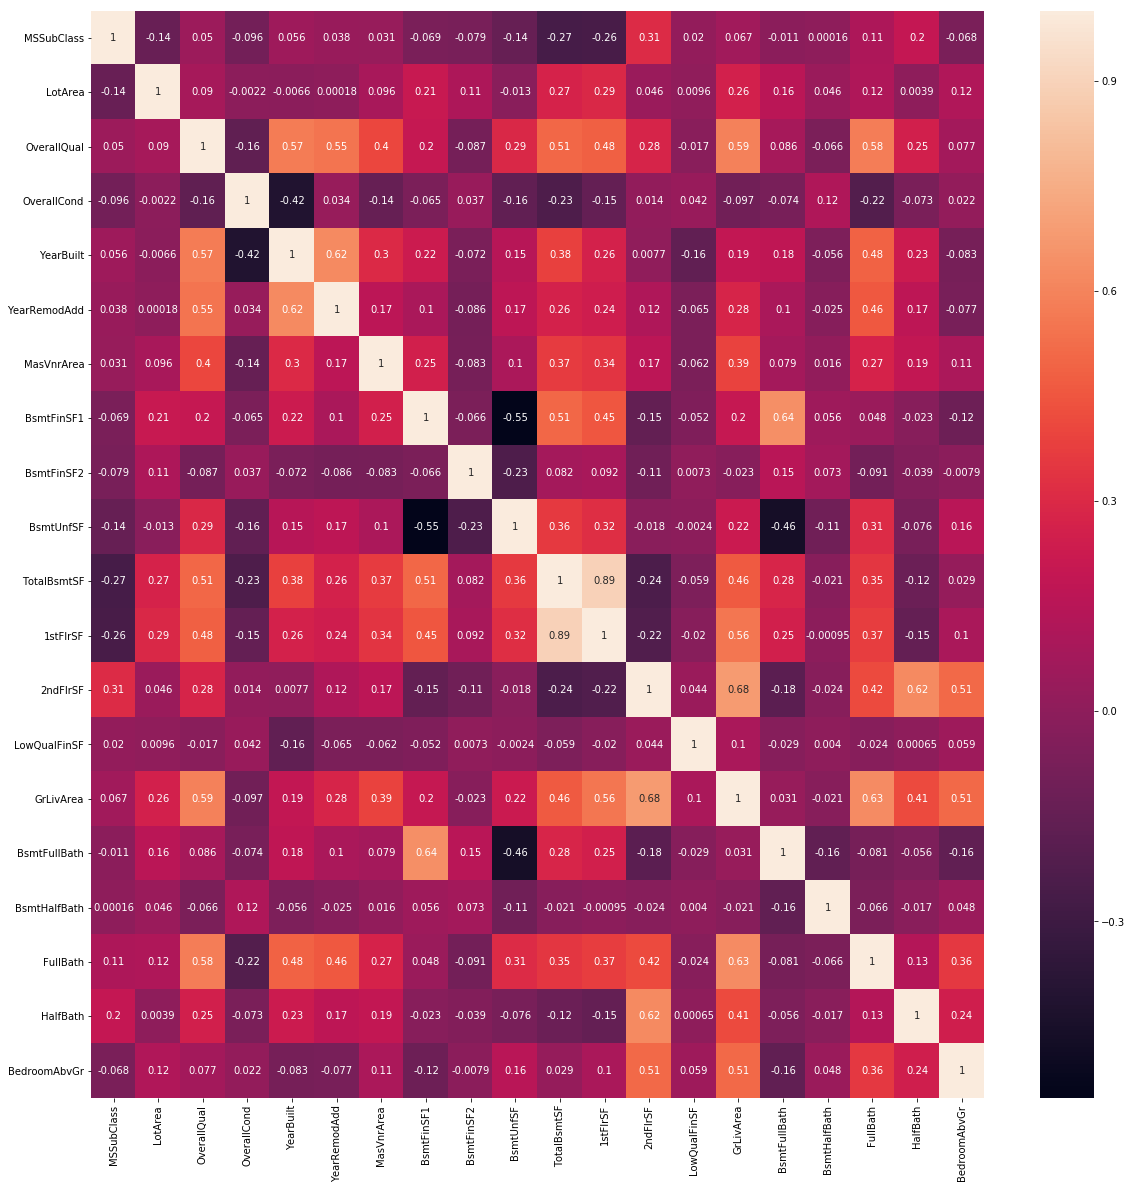

In [494]:
import seaborn as sns
corr=x.iloc[:,:20].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(x[top_features].corr(),annot=True)

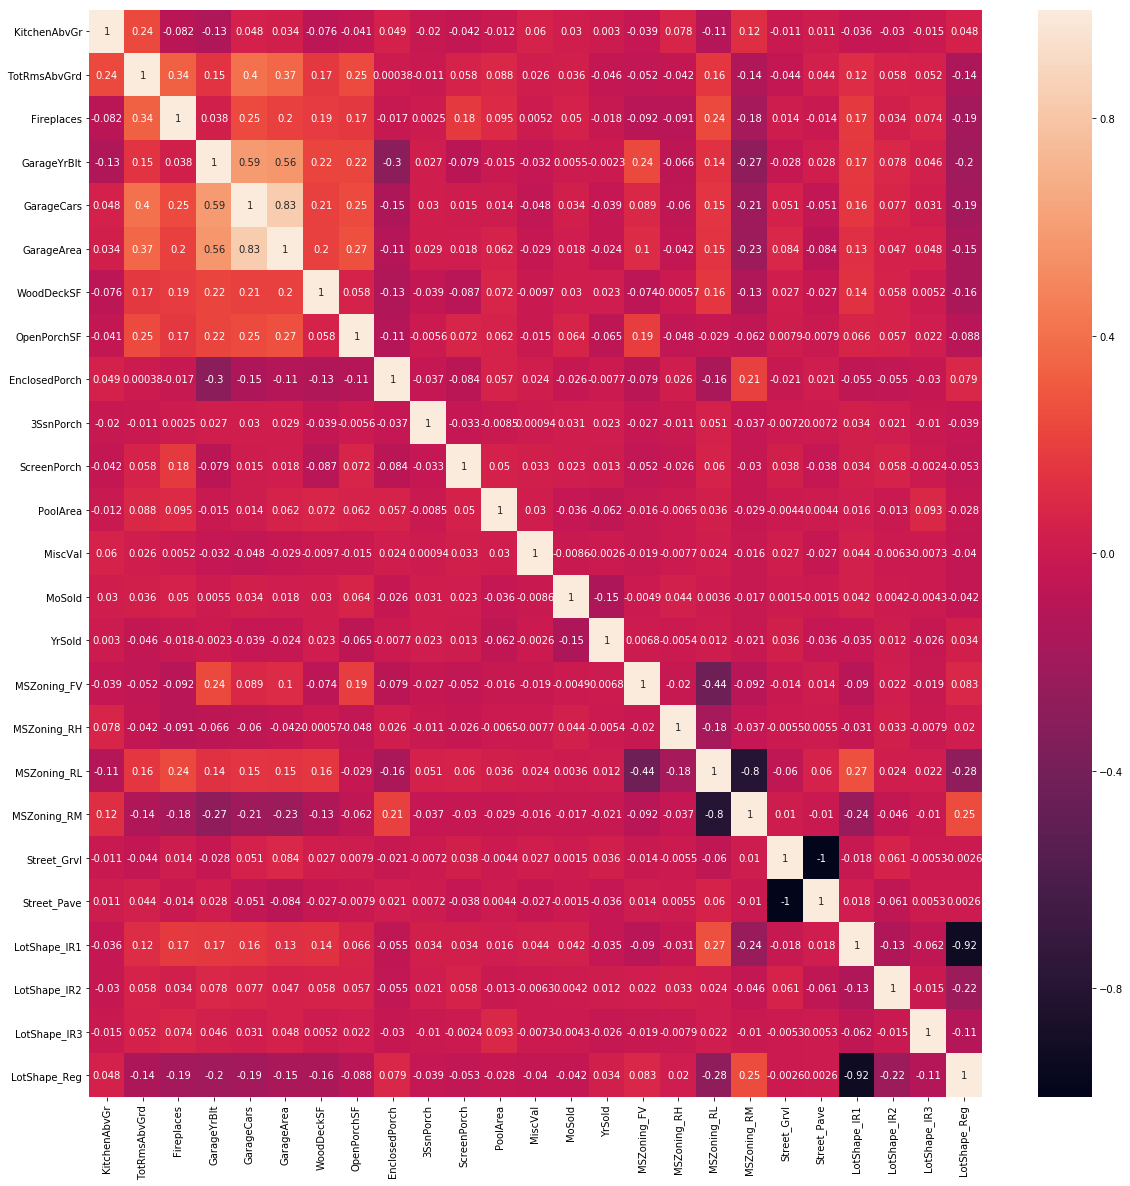

In [496]:
import seaborn as sns
corr=x.iloc[:,20:45].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(x[top_features].corr(),annot=True)

In [543]:
X['MSSubClass'].shape

(1346,)

In [545]:
y=cont1['SalePrice']
y.shape

(1346,)

In [547]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [553]:
#Persons Correlation Feature
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,100)
print(str(len(cor_feature)), 'selected features')


100 selected features


In [552]:
cor_feature

['BsmtFinType1_LwQ',
 'Condition1_Feedr',
 '2ndFlrSF',
 'RoofMatl_WdShngl',
 'KitchenQual_Fa',
 '1stFlrSF',
 'GarageCars',
 'SaleCondition_Abnorml',
 'HouseStyle_1Story',
 'RoofStyle_Hip',
 'Condition1_Artery',
 'LotShape_IR1',
 'BsmtQual_Fa',
 'GarageCond_Fa',
 'BsmtCond_Fa',
 'Exterior2nd_HdBoard',
 'WoodDeckSF',
 'GarageArea',
 'GarageType_BuiltIn',
 'BsmtFinType1_Unf',
 'KitchenQual_Gd',
 'GarageQual_Fa',
 'TotalBsmtSF',
 'PavedDrive_N',
 'Exterior1st_HdBoard',
 'HeatingQC_Gd',
 'BsmtFinType1_ALQ',
 'BldgType_1Fam',
 'EnclosedPorch',
 'BsmtFinType1_Rec',
 'BsmtFinType1_BLQ',
 'GrLivArea',
 'BsmtFinSF1',
 'Exterior2nd_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_MetalSd',
 'MSSubClass',
 'HouseStyle_1.5Fin',
 'Exterior2nd_Wd Sdng',
 'Electrical_SBrkr',
 'Exterior2nd_VinylSd',
 'Electrical_FuseA',
 'Exterior1st_Wd Sdng',
 'Condition1_Norm',
 'OpenPorchSF',
 'CentralAir_N',
 'BsmtExposure_Gd',
 'ExterCond_TA',
 'MoSold',
 'BsmtFinType2_Unf',
 'Foundation_BrkTil',
 'LotArea',
 'Heat

In [576]:
threshold=0.8

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [581]:
corrleat=list(correlation(X,threshold))

In [583]:
len(corrleat),corrleat

(32,
 ['YearRemodAdd',
  'Exterior2nd_HdBoard',
  'SaleCondition_Partial',
  '1stFlrSF',
  'Electrical_Mix',
  'GarageYrBlt',
  'Exterior2nd_CBlock',
  'LandSlope_Gtl',
  'TotRmsAbvGrd',
  'HouseStyle_2Story',
  'Exterior2nd_AsbShng',
  'KitchenAbvGr',
  'OverallQual',
  'GarageCond_TA',
  'Heating_GasA',
  'Utilities_AllPub',
  'Exterior2nd_Wd Sdng',
  'CentralAir_Y',
  'GarageArea',
  'LotArea',
  'Exterior2nd_VinylSd',
  'YearBuilt',
  'GarageQual_TA',
  'Condition2_Norm',
  'PavedDrive_Y',
  'RoofMatl_CompShg',
  'Street_Pave',
  'Functional_Typ',
  'YrSold',
  'GarageCond_Ex',
  'Exterior2nd_CmentBd',
  'Exterior2nd_MetalSd'])

# Regression Feature Selection:
(Numerical Input, Numerical Output)
This section demonstrates feature selection for a regression problem that as numerical inputs and numerical outputs.

A test regression problem is prepared using the make_regression() function.

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.



In [580]:
#Univarient selection methods
#Using selectkbest for Classification chi2 , f_classif , mutual_info_classif
#Using selectkbest for Refression f_regression,mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif , mutual_info_classif,f_regression,mutual_info_regression
#from sklearn.preprocessing import MinMaxScaler
#X_norm = MinMaxScaler().fit_transform(x)


In [607]:
reg_selector = SelectKBest(f_regression, k=100)

In [608]:
reg_selector.fit(X_Norm, y)


SelectKBest(k=100, score_func=<function f_regression at 0x0000027C56775488>)

In [609]:
reg_support = reg_selector.get_support()
reg_feature = x.loc[:,reg_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

100 selected features


In [610]:
reg_feature

['MSSubClass',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'YrSold',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_Reg',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition2_Norm',
 'BldgType_1Fam',
 'HouseStyle_1.5Fin',
 'HouseStyle_1Story',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'RoofMatl_CompShg',
 'RoofMatl_WdShngl',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Ex',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_TA',
 '

# Wrapper Methods

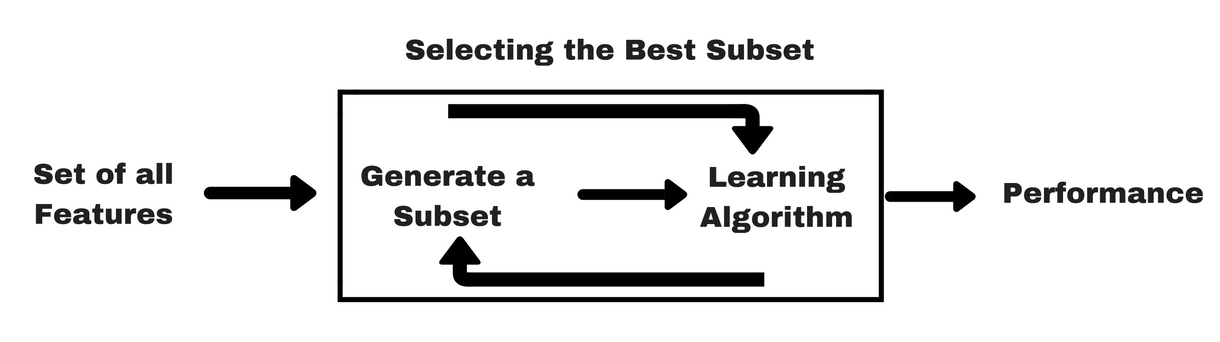

In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

    Forward Selection: 
    =================
    Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.
    Backward Elimination:
    ====================
    In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

    Recursive Feature elimination: 
    =============================
    It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

One of the best ways for implementing feature selection with wrapper methods is to use Boruta package that finds the importance of a feature by creating shadow features.

It works in the following steps:

    1. Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).
    2. Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.
    3. At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

    4. Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.



In [584]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


Fitting estimator with 239 features.
Fitting estimator with 229 features.
Fitting estimator with 219 features.
Fitting estimator with 209 features.
Fitting estimator with 199 features.
Fitting estimator with 189 features.
Fitting estimator with 179 features.
Fitting estimator with 169 features.
Fitting estimator with 159 features.
Fitting estimator with 149 features.
Fitting estimator with 139 features.
Fitting estimator with 129 features.
Fitting estimator with 119 features.
Fitting estimator with 109 features.
100 selected features


In [585]:
rfe_feature

['LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Ex',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'Bsmt

# Embedded Methods

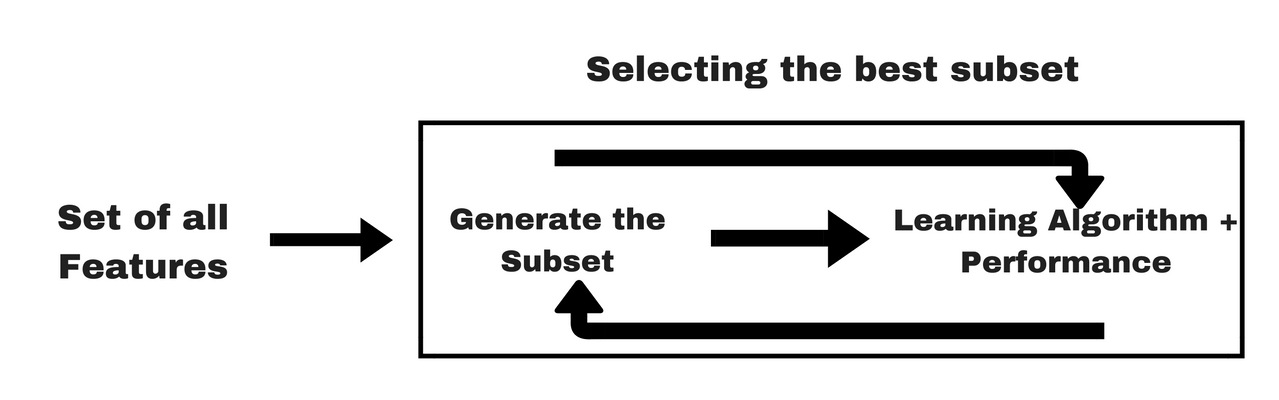

Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.

1. Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
2. Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.

In [594]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

embeded_lr_selector = SelectFromModel(Lasso(alpha=0.1))
embeded_lr_selector.fit(X, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

42 selected features


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [595]:
embeded_lr_feature

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BedroomAbvGr',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Condition1_Norm',
 'Exterior2nd_CmentBd',
 'MasVnrType_BrkFace',
 'ExterQual_Ex',
 'ExterQual_TA',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'KitchenQual_Ex',
 'Functional_Typ',
 'SaleCondition_Partial',
 'Neighborhood_cat']

# Difference between Filter and Wrapper methods
The main differences between the filter and wrapper methods for feature selection are:

1. Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
2. Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
3. Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.
4. Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
5. Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

# Feature Importance

This is an Embedded method. As said before, Embedded methods use algorithms that have built-in feature selection methods.
1. We can also use RandomForest to select features based on feature importance.
2. We calculate feature importance using node impurities in each decision tree. In Random forest, the final feature importance is the average of all decision tree feature importance.

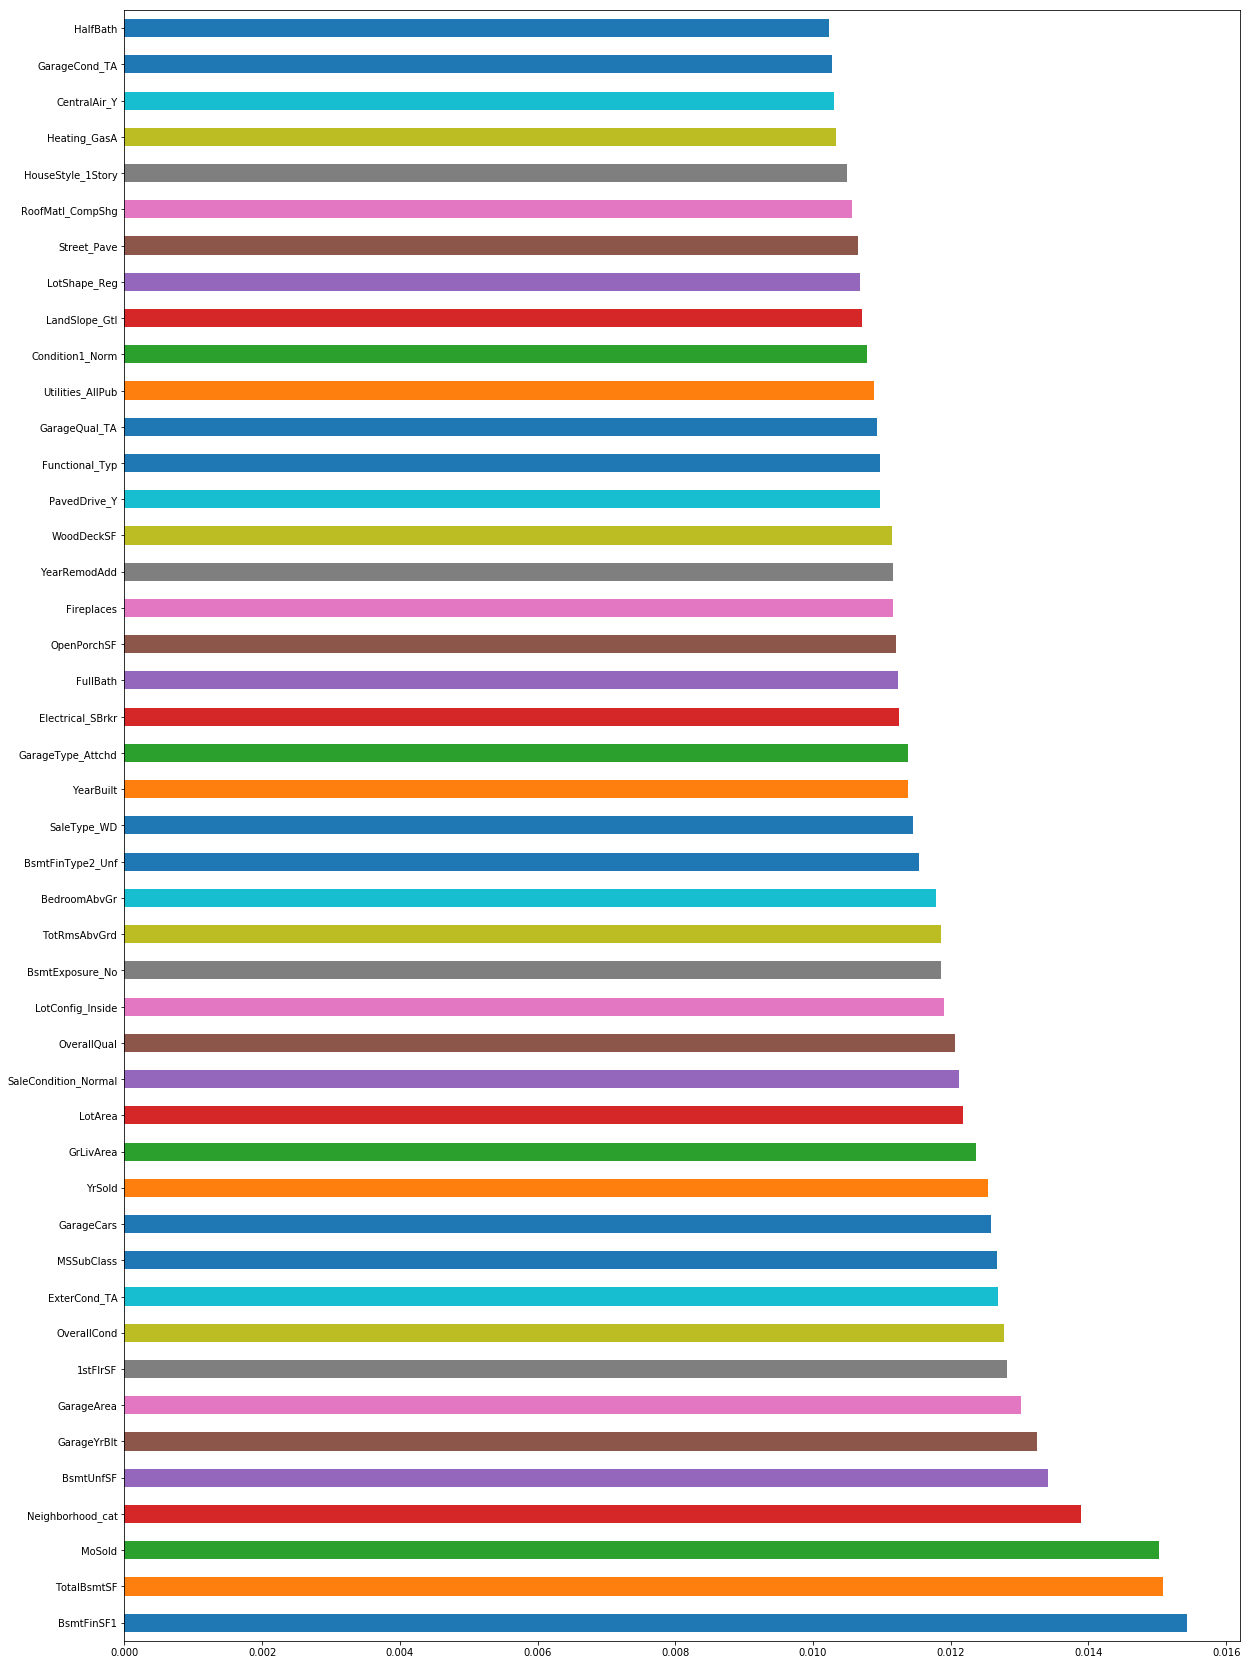

In [601]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,30))
feat_importances.nlargest(45).plot(kind='barh')

plt.show()

In [603]:
feat_importances.nlargest(45).index

Index(['BsmtFinSF1', 'TotalBsmtSF', 'MoSold', 'Neighborhood_cat', 'BsmtUnfSF',
       'GarageYrBlt', 'GarageArea', '1stFlrSF', 'OverallCond', 'ExterCond_TA',
       'MSSubClass', 'GarageCars', 'YrSold', 'GrLivArea', 'LotArea',
       'SaleCondition_Normal', 'OverallQual', 'LotConfig_Inside',
       'BsmtExposure_No', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BsmtFinType2_Unf',
       'SaleType_WD', 'YearBuilt', 'GarageType_Attchd', 'Electrical_SBrkr',
       'FullBath', 'OpenPorchSF', 'Fireplaces', 'YearRemodAdd', 'WoodDeckSF',
       'PavedDrive_Y', 'Functional_Typ', 'GarageQual_TA', 'Utilities_AllPub',
       'Condition1_Norm', 'LandSlope_Gtl', 'LotShape_Reg', 'Street_Pave',
       'RoofMatl_CompShg', 'HouseStyle_1Story', 'Heating_GasA', 'CentralAir_Y',
       'GarageCond_TA', 'HalfBath'],
      dtype='object')

In [611]:
feat_importances

MSSubClass               0.012675
LotArea                  0.012181
OverallQual              0.012064
OverallCond              0.012772
YearBuilt                0.011384
YearRemodAdd             0.011163
MasVnrArea               0.009268
BsmtFinSF1               0.015435
BsmtFinSF2               0.003304
BsmtUnfSF                0.013407
TotalBsmtSF              0.015081
1stFlrSF                 0.012814
2ndFlrSF                 0.010220
LowQualFinSF             0.000298
GrLivArea                0.012366
BsmtFullBath             0.008474
BsmtHalfBath             0.002815
FullBath                 0.011238
HalfBath                 0.010235
BedroomAbvGr             0.011788
KitchenAbvGr             0.010106
TotRmsAbvGrd             0.011861
Fireplaces               0.011166
GarageYrBlt              0.013248
GarageCars               0.012587
GarageArea               0.013018
WoodDeckSF               0.011153
OpenPorchSF              0.011207
EnclosedPorch            0.004405
3SsnPorch     